## Nonlinear Supervised Learning Series

# Part 1: Features, functions, and nonlinearity

In this post describe a number of relatively simple instances of nonlinear regression and classification.  These instances - ranging from toy datasets to classic examples from differential equations - have only one or two input dimensions and exhibit relatively simple nonlinear relationships.  These factors allow us to visually examine patterns in the data and propose appropriate nonlinearities, which we can (as we will see) very quickly inject into our linear supervised paradigm to produce nonlinear fits (in the case of regression) or separation (in the case of classification).

By walking through these examples we can flush out a number important concepts, coding principles, and jargon-terms in a relatively simple environment that will be omnipresent in our discussion of nonlinear supervised learning going forward.

In [10]:
# imports from custom library
import sys
sys.path.append('../../')
import autograd.numpy as np
from mlrefined_libraries import nonlinear_superlearn_library as nonlib
datapath = '../../mlrefined_datasets/nonlinear_superlearn_datasets/'
%matplotlib notebook

# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1.  From linear to nonlinear modeling

In this short Section we go back to the arguments that led to our derivations of linear regression and classification and see how nonlinearity can just as easily be injected into these derivations.  This will help us see that the generic framework of nonlinear supervised learning is derived in precisely the same way our familiar linear versions came from.

## 1.1  Modeling principles for linear / nonlinear regression

Thus far we have detailed the principles and practices for effectively performing linear supervised learning - that is linear regression and classification.  In the former case we began with a very particular desire to relate the input/output of a given dataset linearly as

\begin{equation}
w_0 + \mathbf{w}_{\,}^{T}\mathbf{x}_p \approx y_p
\end{equation}

where the pair $\left(\mathbf{x}_p\,,y_p \right)$ is a datapoint from a set of $P$ such points and $w_0$ and $\mathbf{w}$ are the bias and $N$ length vector of 'slope' weights.  This was our ideal scenario, that is, when these weights were tuned properly they all lie close to a particular hyperplane defined by the ideal weights. 

 The linear modeling assumption enters on the left side of each $\approx$ sign, our predictor which takes in a datapoint $\mathbf{x}_p$ and outputs a prediction we hope matches $y_p$ closely.  We can write our linear predictor more generically as
 
\begin{equation}
\text{predict}\left(x\right) = w_0 + \mathbf{w}^T\mathbf{x}^{\,}
\end{equation}
 
in which our desire above can be written equivalently as 

\begin{equation}
\text{predict}\left(\mathbf{x}_p\right) \approx y_p.
\end{equation}

As we saw in our discussion of [Linear Regression](https://jermwatt.github.io/mlrefined/blog_posts/Linear_Supervised_Learning/Part_1_Linear_regression.html) the ideal weight scenario expressed in equation (2) naturally lead us to propose squaring the difference between both sides of that equation as $\left(\text{predict}\left(\mathbf{x}_p\right) - y_p\right)^2$ and summing over $p=1,...,P$ forming the Least Squares cost function

\begin{equation}
g\left(w_0\,,\mathbf{w}_{\,}\right) = \sum_{p=1}^{P}\left(\text{predict}\left(x_p\right) - y_p\right)^2.
\end{equation}

Intuitively those weights providing us with the smallest possible value of this cost function are our ideal weights - and force equation (1) / (2) to hold as well as possible for as many points as possible.  In other words, by minimizing this cost function we recover the sort of ideal weights we dreampt of having at the start.

#### <span style="color:#a50e3e;">Example 1. </span>  The perfect dataset for linear regression

In a perfect world the $\approx$ sign above in equation (1) / (2) would be a strict $=$ sign i.e., $\text{predict}\left(\mathbf{x}_p\right) =  y_p$.  In such a perfect instance the dataset lies precisely on a line (or more generally, a hyperplane).  The most perfect dataset we could possibly have for linear regression is then - ignoring computation - a line (or hyperplane) itself (as illustrated below in the animated gif).

<figure>
<p>
  <img src= '../../mlrefined_images/nonlinear_superlearn_images/linear_regression_to_funcapprox.gif' width="70%" height="70%" alt=""/>
</p>
<figcaption> <strong>Figure 1:</strong> <em> 
In this gif we start off by showing a realistic linear regression dataset (a small noisy set of points that can be roughly modeled by a line).  We then progress to remove all noise from those points (making them all lie perfectly on some line), and finally show the perfect linear regression scenario where we have infinitely many points lying perfectly on a line. 
</em>
</figcaption>
</figure>

---

Looking over this argument and the ideal scenario we began with, nothing about it depended on our use of a *linear* model: a nonlinear assumption about how a dataset's input and output are related would lead to the same sort of conclusion.  In other words we could have just as well started with (instead of equation (1) or (2)) with the supposition of a nonlinear predictive model

\begin{equation}
\text{predict}\left(\mathbf{x}\right)  = 
w_0^{\,} + {w}_{1}^{\,}\,f\left(\mathbf{x}_p\right)
\end{equation}

where here $f$ is some nonlinear function like e.g., a sine function.  Again we could consider the ideal case - where we have knowledge of the best possible weights so that 

\begin{equation}
\text{predict}\left(\mathbf{x}_p\right) \approx y_p.
\end{equation}

To recover our ideal weights we would follow the same logic as previously: square the difference between both sides of the above and sum over all the points, giving the Least Squares cost function $
g\left(w_0\,,\mathbf{w}\right) = \sum_{p=1}^{P}\left(\text{predict}\left(x_p\right) - y_p\right)^2
$ that - when minimized properly - provides us with our desired weights.

Note how in general with nonlinear regression we can consider a predictor which is a weighted sum of $B$ nonlinear functions of our input as

\begin{equation}
\text{predict}\left(\mathbf{x}\right) = w_0 + {w}_{1}\,f_1\left(\mathbf{x}_p\right) +  {w}_{2}\,f_2\left(\mathbf{x}_p\right) + \cdots + w_B\,f_B\left(\mathbf{x}_p\right)  
\end{equation}

where $f_1,\,f_2,\,...\,f_B$ are nonlinear functions and $w_0$ through $w_B$ are weights to be learned.  Nonetheless the steps we take to formally employ such a model, its ideal weight values, the derivation of a Least Squares cost function, etc., are entirely similar to what we have now seen in the simpler instance of nonlinear regression (which itself does not differ from the steps taken in modeling the linear case).

#### <span style="color:#a50e3e;">Example 2. </span>  The perfect dataset for nonlinear regression

In complete analogy to the linear case, here our perfect dataset would consist of points where $\text{predict}\left(\mathbf{x}_p\right) = y_p$, i.e., points lying perfectly on the nonlinear curve (or in general the nonlinear surface) defined by $f$.   The most perfect dataset we could possibly have for nonlinear regression is then - ignoring computation - a curve (or surface) itself (as illustrated below in the animated gif).

<figure>
<p>
<img src= '../../mlrefined_images/nonlinear_superlearn_images/nonlinear_regression_to_funcapprox.gif' width="50%" height="50%" alt=""/>
</p>
<figcaption> <strong>Figure 2:</strong> <em> 
In this gif we start off by showing a realistic nonlinear regression dataset (a small noisy set of points that can be roughly modeled by a nonlinear curve).  We then progress to remove all noise from those points (making them all lie perfectly on some curve), and finally show the perfect nonlinear regression scenario where we have infinitely many points lying perfectly on the curve itself.  
</em>
</figcaption>
</figure>

---

## 1.2  Modeling principles for linear / nonlinear classification

With linear classification we started out with a desire that our two-class classification dataset could be represented by a step function with linear boundary (see our post on [logistic regression](https://jermwatt.github.io/mlrefined/blog_posts/Linear_Supervised_Learning/Part_2_logistic_regression.html) and [the perceptron](https://jermwatt.github.io/mlrefined/blog_posts/Linear_Supervised_Learning/Part_3_Perceptron.html)).  As with regression we began our derivation of the various cost functions for linear two-class classification by assuming we had we wanted: ideal weights for a line - and more generally a hyperplane - in the input space $w_0 + \mathbf{w}_{\,}^{T}\mathbf{x}_{\,}^{\,} = 0$ that strictly separates our two classes.  This hyperplane would be such that virtually every point with label $+1$ lies above it, and almost every point with label $-1$ lies below it, or equivalently that

\begin{equation}
\text{sign}\left(w_0+\mathbf{w}_{\,}^{T}\mathbf{x}_{p}^{\,}\right) \approx y_p.
\end{equation}

As we did with regression above, we will now find it helpful to generalize our predictor modeling notation.  Denoting 

\begin{equation}
\text{predict}\left(\mathbf{x}\right) = w_0 + \mathbf{w}^T\mathbf{x}^{\,}
\end{equation}

our linear decision boundary can then be expressed simply as those $\mathbf{x}$ where $\text{predict}\left(\mathbf{x}\right) = 0$, and we can then equivalently express e.g., the equation above as

\begin{equation}
\text{sign}\left(\text{predict}\left(\mathbf{x}_p\right)\right) \approx y_p.
\end{equation}

From both the perspective of logistic regression and the perceptron we saw how this initial desire can - using a few tricks from algebra and the softmax approximation to the maximum function - lead to the so-called softmax or logistic regression cost function

\begin{equation}
g\left(w_0^{\,}\,,\mathbf{w}^{\,}\right) = \sum_{p=1}^{P}\text{log}\left(1 + e^{- y_p\,\text{predict}\left(\mathbf{x}_p\right)}\right).
\end{equation}

Of course it can also lead to other cost functions as well like e.g., the relu/perceptron cost.  Regardless, by minimizing this cost function properly we recover the ideal weights we started off wanting in the first place, i.e., those that force equation (8) / (9) to hold for as many points as possible. 

#### <span style="color:#a50e3e;">Example 3. </span>  The perfect dataset for linear classification

Examining our setup, here for linear two-classification our perfect dataset would consist of points where $\text{predict}\left(\mathbf{x}_p\right) = y_p$, i.e., points lying perfectly on the step function with linear boundary given by $\text{predict}\left(\mathbf{x}\right) = 0$.  The most perfect dataset we could possibly have for linear classification is then - ignoring computation - a perfect step function (with linear boundary) itself.  This is illustrated below in the animated gif.

<figure>
<p>
<img src= '../../mlrefined_images/nonlinear_superlearn_images/linear_classification_to_funcapprox.gif' width="80%" height="80%" alt=""/>
</p>
<figcaption> <strong>Figure 3:</strong> <em> 
In this gif we start off by showing a realistic linear classification dataset (a small noisy set of points that can be roughly modeled by a step function).  We then progress to remove all noise from those points (i.e., returning the true label values to our 'noisy' points), and finally show the perfect linear classification scenario where we have infinitely many points lying perfectly on a step function with linear boundary. 
</em>
</figcaption>
</figure>

----

Looking over this argument and the ideal scenario we began with, nothing about it depended on our use of a *linear* model.   A nonlinear assumption about the shape of the decision boundary defining the step function on which our data sits will equally well lead to the same conclusion visa-vis the sort of cost functions we might minimize in order to recover ideal weights defining this boundary.  In other words we could have just as well started with (instead of equation (8) or (10)) with the supposition of a nonlinear decision boundary

\begin{equation}
\text{predict}\left(\mathbf{x}\right)  = 
w_0^{\,} + {w}_{1}^{\,}\,f\left(\mathbf{x}_p\right)
\end{equation}

where here $f$ is some nonlinear function like e.g., a sine function.  Again we could consider the ideal case - where we have knowledge of the best possible weights so that 

\begin{equation}
\text{sign}\left(\text{predict}\left(\mathbf{x}_p\right)\right) \approx y_p.
\end{equation}

and so that we learn a corresponding decision boundary given by $\text{predict}\left(\mathbf{x}\right) = 0.$

To recover our ideal weights we would follow the same logic as previously leading to e.g., the softmax cost function $
g\left(w_0^{\,}\,,\mathbf{w}^{\,}\right) = \sum_{p=1}^{P}\text{log}\left(1 + e^{- y_p\,\text{predict}\left(\mathbf{x}_p\right)}\right)$
 that - when minimized properly - provides us with our desired weights.

Note how in general with nonlinear regression we can consider a predictor which is a weighted sum of $B$ nonlinear functions of our input as

\begin{equation}
\text{predict}\left(\mathbf{x}\right) = w_0 + {w}_{1}\,f_1\left(\mathbf{x}\right) +  {w}_{2}\,f_2\left(\mathbf{x}\right) + \cdots + w_B\,f_B\left(\mathbf{x}\right)  
\end{equation}

where $f_1,\,f_2,\,...\,f_B$ are nonlinear functions and $w_0$ through $w_B$ are weights to be learned.  Nonetheless the steps we take to formally employ such a model, its ideal weight values, the derivation of a e.g., the softmax cost function, etc., are entirely similar to what we have now seen in the simpler instance of nonlinear classification (which itself does not differ from the steps taken in modeling the linear case).

#### <span style="color:#a50e3e;">Example 4. </span>  The perfect dataset for nonlinear classification

Examining our setup, here for nonlinear two-classification our perfect dataset would consist of points where $\text{predict}\left(\mathbf{x}_p\right) = y_p$, i.e., points lying perfectly on the step function with nonlinear boundary given by $\text{predict}\left(\mathbf{x}\right) = 0$.  The most perfect dataset we could possibly have for nonlinear classification is then - ignoring computation - a perfect step function (with nonlinear boundary) itself.  This is illustrated below in the animated gif.

<figure>
<p>
<img src= '../../mlrefined_images/nonlinear_superlearn_images/nonlinear_classification_to_funcapprox.gif' width="80%" height="80%" alt=""/>
</p>
<figcaption> <strong>Figure 4:</strong> <em> 
In this gif we start off by showing a realistic nonlinear classification dataset (a small noisy set of points that can be roughly modeled by a step function with nonlinear boundary).  We then progress to remove all noise from those points (i.e., returning the true label values to our 'noisy' points), and finally show the perfect nonlinear classification scenario where we have infinitely many points lying perfectly on a step function with nonlinear boundary. 
</em>
</figcaption>
</figure>

# 2.  Specific examples of nonlinear regression and classification

For some low-dimensional problems we can determine a proper nonlinearity for regression or classification 'by eye', that is by examining a dataset visually.  For other more classic low-dimensional problems - particularly with nonlinear regression - one can additionally reason out an appropriate nonlinearity using domain knowledge from physics and economics via so-called *differential equations*.

In this section we explore several examples in the former category - datasets that we can visualize and whose nonlinear patterns are simple enough for us to be able to identify by eye.  These examples will allow us to introduce a number of important principles, formulations, and jargon-terms - that we will see considerably more of when discussing neural networks, tree-based learners, and kernels - in a comparatively simple context.

## 2.1  Introductory nonlinear regression examples 

Now we examine a number of relatively simple examples of nonlinear regression, summarizing our discoveries after each one.

#### <span style="color:#a50e3e;">Example 5. </span> A sinusoidal dataset

Let us first look at the following sinusoidal-looking dataset.

<IPython.core.display.Javascript object>


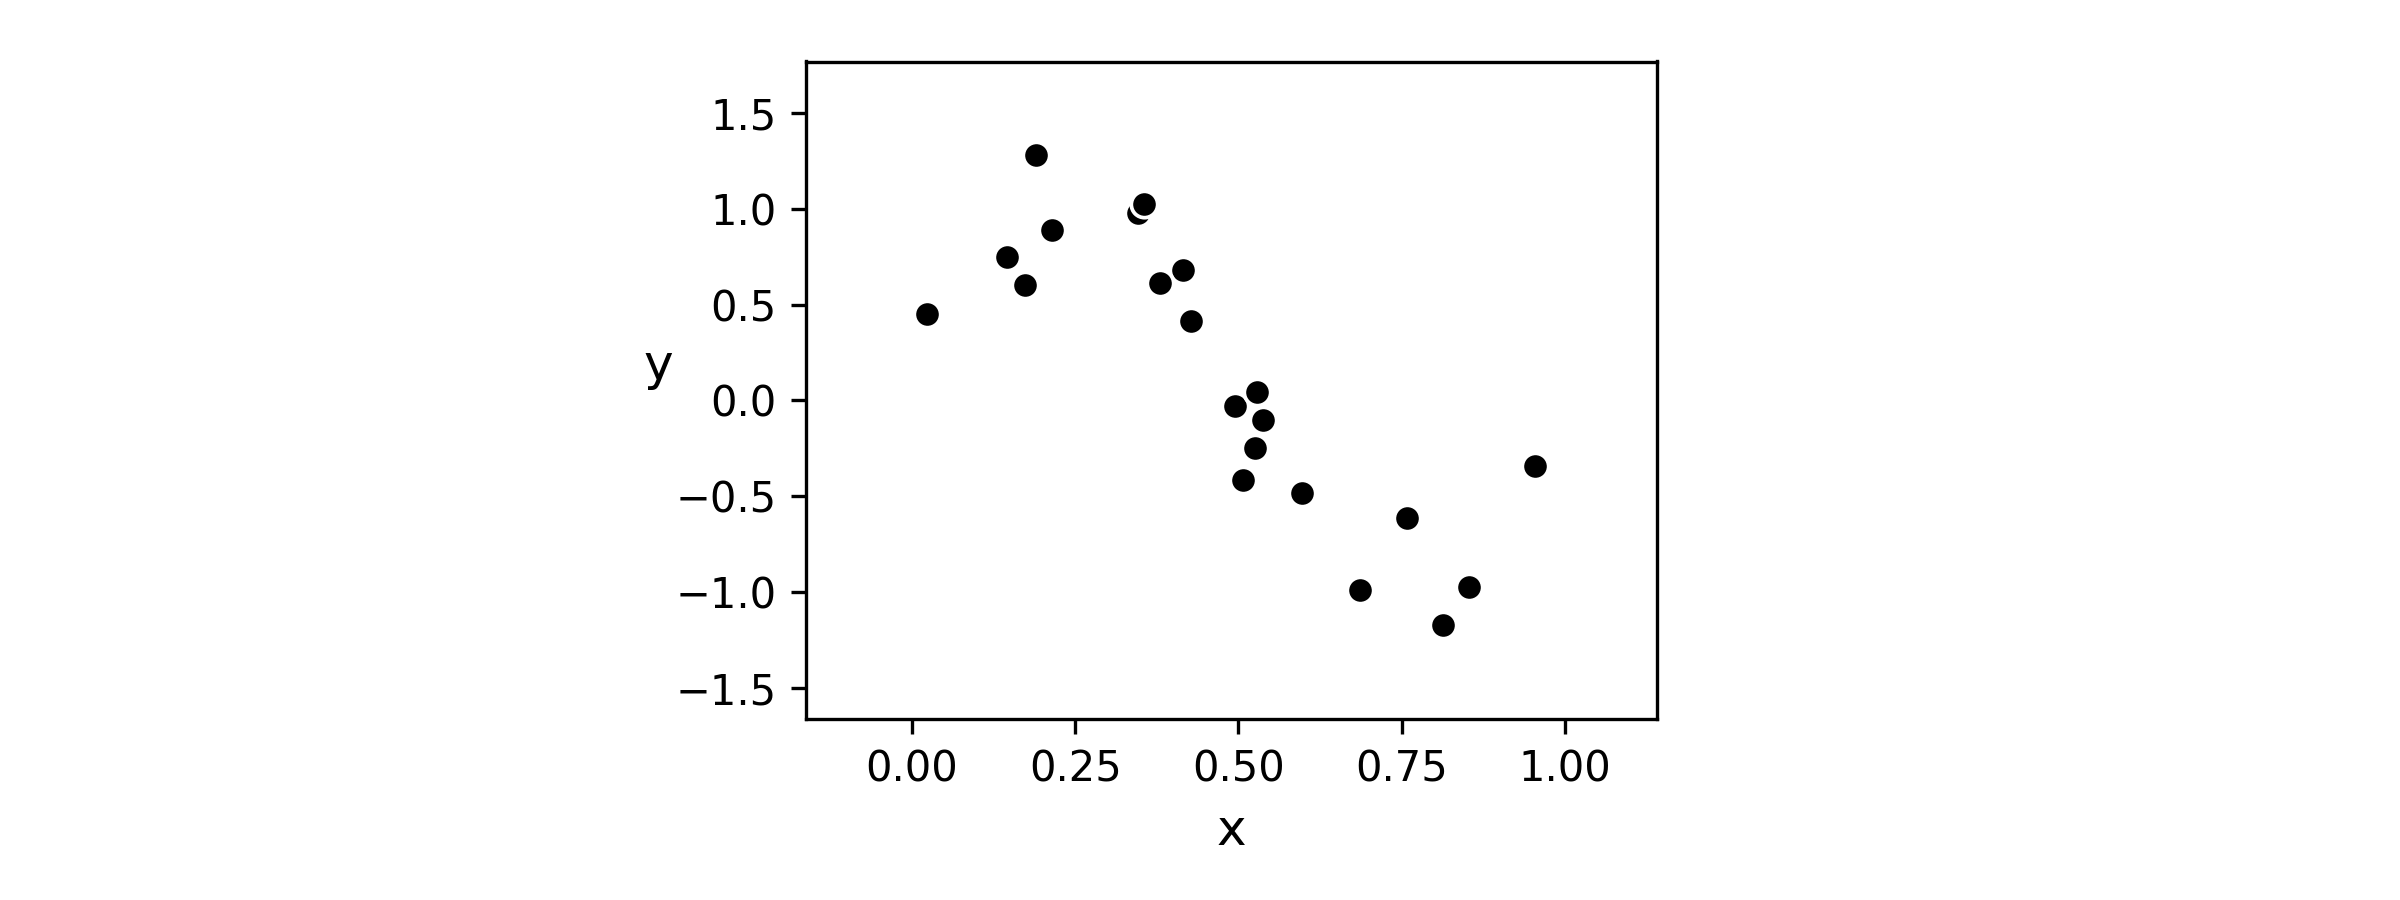

In [11]:
# create instance of linear regression demo, used below and in the next examples
demo1 = nonlib.nonlinear_regression_visualizer.Visualizer(csvname = datapath + 'noisy_sin_sample.csv')
demo1.plot_data(xlabel = 'x',ylabel = 'y')

Since this dataset looks sinusoidal, we could defensibly propose that the the completely parameterized sine function

\begin{equation}
w_0 + w_1\text{sin}\left(w_2 + w_3x_p\right) \approx y_p
\end{equation}

could fit the data well if its parameters are all tuned properly.  In other words, using our `predictor` notation introduced in the previous section, we will fit the following nonlinear regressor to our data

\begin{equation}
\text{predict}(x) = w_0 + w_1\text{sin}\left(w_2 + w_3x\right)
\end{equation}

How do we fit this predictor to our dataset?  As detailed in the previous Section the desire to fit such a predictor to our dataset leads - as was the case with linear regression - directly to the minimization of a Least Squares cost function 

\begin{equation}
g\left(\mathbf{w}\right) = \sum_{p = 1}^P \left(\text{predict}\left(x_p\right) - y_p\right)^2.
\end{equation}

We can minimize this Least Squares cost via e.g., [normalized gradient descent](https://jermwatt.github.io/mlrefined/blog_posts/Mathematical_Optimization/Part_2_gradient_descent.html), which we will do below.  First however notice how our use of the `predictor` notation for our modeling makes coding up this Least Squares cost in Python rather straight forward.  As shown in the next Python cell, we can construct the cost function modularly by first creating the sinusoid nonlinearity, then the `predict` function, then the Least Squares cost itself.

In [12]:
# the sinusoid nonlinearity
def f(x_val,w):
    # create feature
    f_val = np.sin(w[2] + w[3]*x_val)
    return f_val

# our prediction function
def predict(x_val,w):
    # linear combo
    val = w[0] + w[1]*f(x_val,w)
    return val

# our least squares cost function
def least_squares(w):
    cost = 0
    for p in range(0,len(y)):
        x_p = x[p]
        y_p = y[p]
        cost +=(predict(x_p,w) - y_p)**2
    return cost

Now we can minimize this cost using gradient descent.  Here we are using the normalized version [discussed in our post on gradient descent algorithms](https://jermwatt.github.io/mlrefined/blog_posts/Mathematical_Optimization/Part_2_gradient_descent.html), which works especially well for non-convex cost functions.  We will see later when discussing neural networks, that whenever we use a predictor containing nonlinear functions with internal parameters our resulting cost function is typically non-convex.

In [15]:
# gather and center data
demo1.center_data(); x = demo1.x; y = demo1.y;

# declare an instance of our current our optimizers
opt = nonlib.optimimzers.MyOptimizers()

# run desired algo with initial point, max number of iterations, etc.,
w_best = opt.gradient_descent(g = least_squares,w = np.random.randn(4,1),max_its = 1000,steplength_rule = 'diminishing',version = 'normalized',output = 'best')

We can then plot the resulting fit to the data - and achieve quite a good fit.

<IPython.core.display.Javascript object>


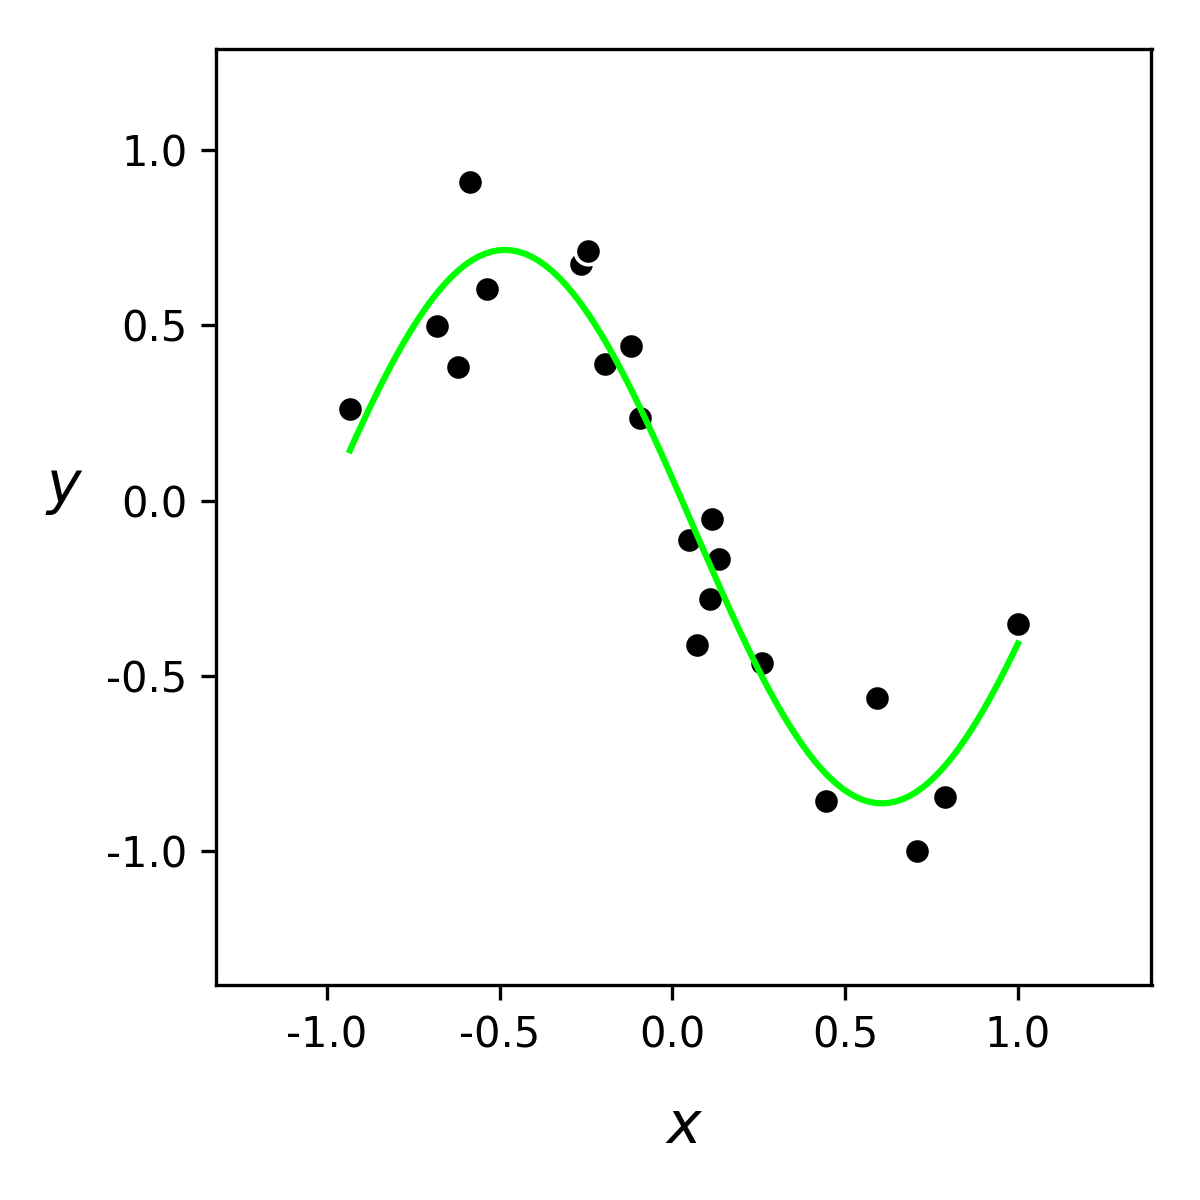

In [16]:
# static transform image
demo1.static_img(w_best,least_squares,predict)

With our weights tuned we can discuss a few finer points of what we have accomplished.  First note that in the parlance of machine learning / deep learning the nonlinear transformation of $x$ we have used (here a sinusoid) in our predictor is called a *feature* or *feature transformation*

\begin{equation}
\text{feature transformation}: f(x\,; w_2,w_3) = \text{sin}\left(w_2 + w_3x\right)
\end{equation}

This is why we wrote $f$ explicitly in our Python implementation above. 

With this notation we can express our predictor more compactly denoting as

\begin{equation}
\text{predict}(x) = w_0 + w_1\, f(x\,; w_2,w_3)
\end{equation}

which shows us that the predictor is a *linear combination* of the feature transform $f$.  With our weights tuned our feature transformation is a function of $x$ alone, so we can express it as $f(x)$ for short, and in the *transformed feature space* whose input is given by $f(x)$ our *nonlinear fit is equivalently a linear one*.  That is if we plot the set of feature-transformed data  transformed data $\left(f\left(x_1\right),y_1\right),\,\left(f\left(x_2\right),y_2\right)...,\left(f\left(x_P\right),y_P\right)$ - as we do below in the right panel - our predictor fits it *linearly*.

Note: we are fitting the same predictor in each space: it is only the input (the horizontal axis in this instance) that we have changed - in the original space it is $x$, in the transformed feature space it is $f(x)$.

<IPython.core.display.Javascript object>


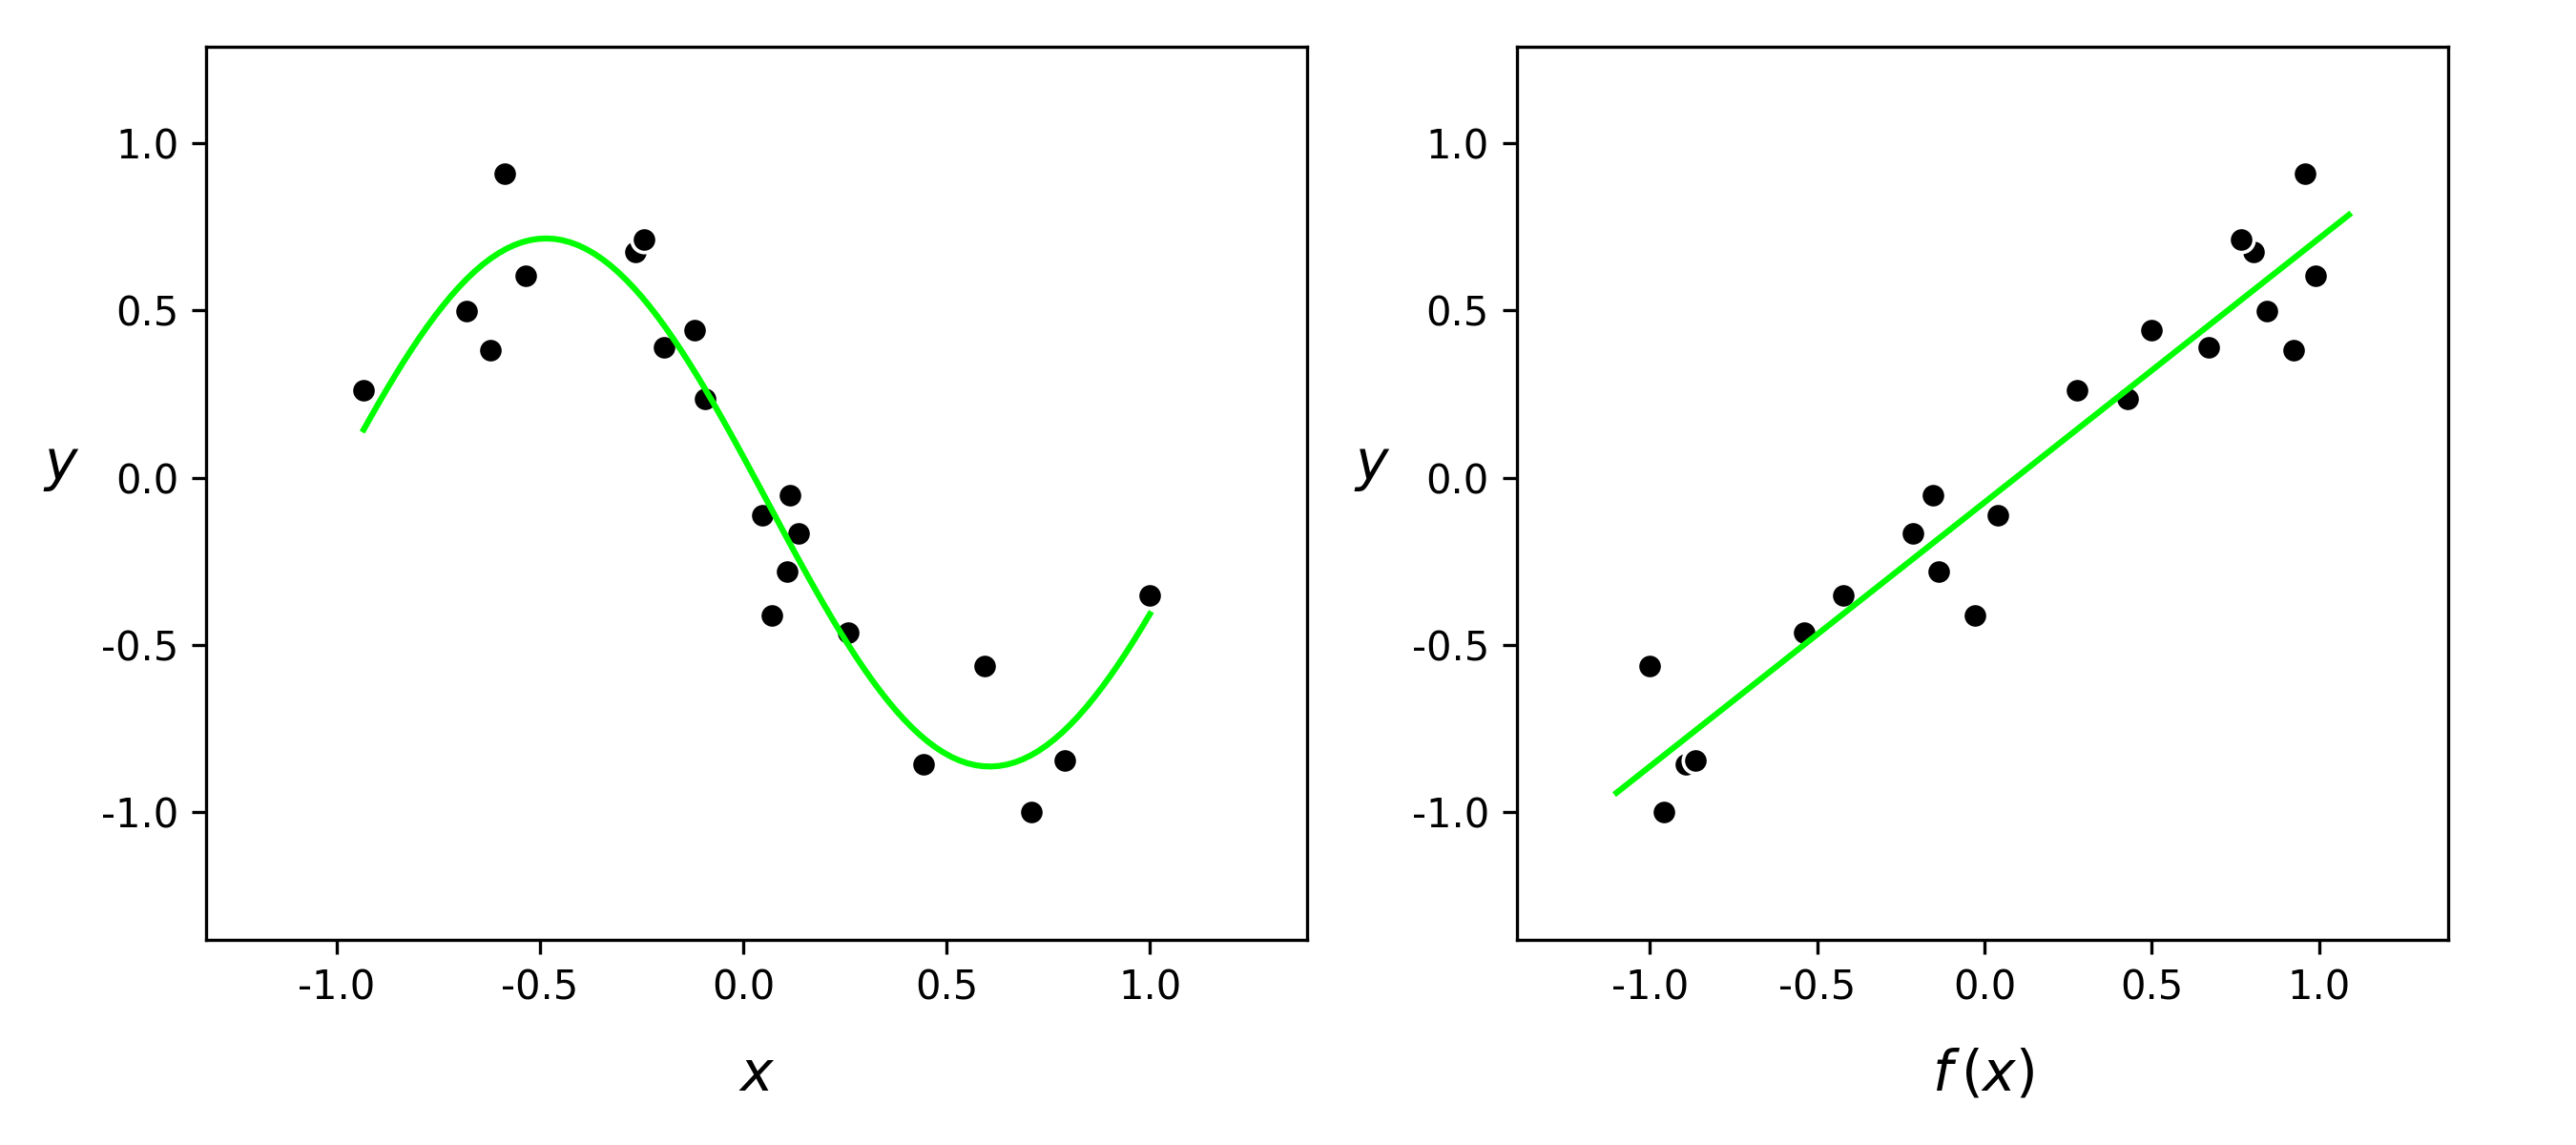

In [20]:
# Show original data with nonlinear fit in left panel, feature transformed data with linear fit in transformed feature space
demo1.static_img(w_best,least_squares,predict,f1_x = [f(v,w_best) for v in x])

This finding is true in general with nonlinear regression problems.

> A properly designed feature (or set of features) provides a good nonlinear fit in the original feature space and, simultaneously, a good linear fit in the transformed feature space.

#### <span style="color:#a50e3e;">Example 6. </span> A population growth example

Next we examine a population growth dataset - which shows the population of Yeast cells growing in a constrained chamber([data source here](http://math.arizona.edu/~dsl/byeast.htm)).  This is a common shape found with population growth data, where the creature under study starts off with only a few members and is only limited in growth by how fast it can reproduce and the resources available in its environment.  In the beginning such a population grows exponentially.  This growth halts rapidly when the population reaches the maximum carrying capacity of its environment.

<IPython.core.display.Javascript object>


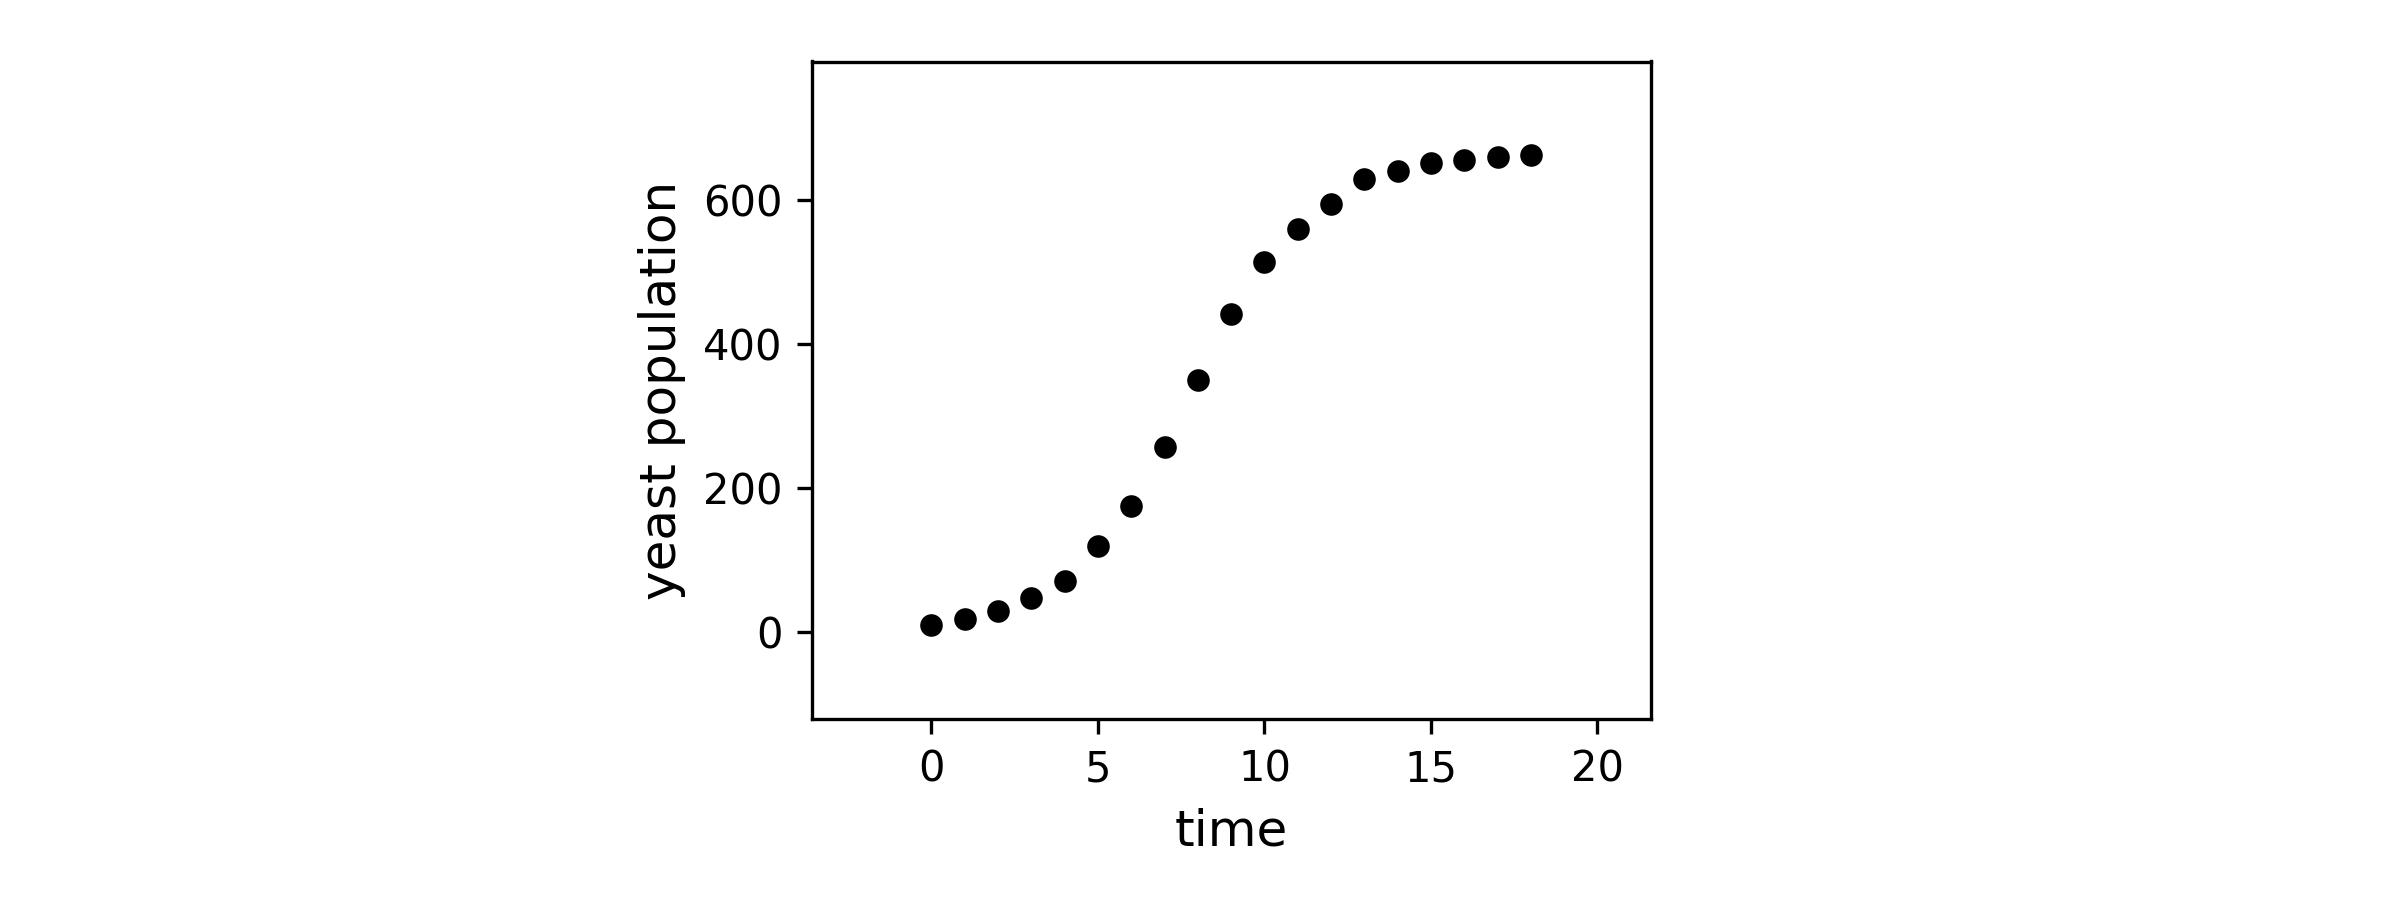

In [21]:
# create instance of linear regression demo, used below and in the next examples
demo2 = nonlib.nonlinear_regression_visualizer.Visualizer(csvname = datapath + 'yeast.csv')

# plot dataset
demo2.plot_data(xlabel = 'time', ylabel = 'yeast population')

If we take a moment and visually examine this dataset, it appears that some sort of logistic tangent nonlinearity would fit it well.  So setting our prediction function to a fully parameterized `tanh` function

\begin{equation}
\text{predict}(x) = w_0 + w_1\text{tanh}\left(w_2 + w_3x\right)
\end{equation}

where here our

\begin{equation}
f\left(x\,; w_2,w_3\right) = \text{tanh}\left(w_2 + w_3x\right)
\end{equation}

is our feature of the input, we can once again form and minimize the Least Squares cost function written generically as $g\left(\mathbf{w}\right) = \sum_{p = 1}^P \left(\text{predict}\left(x_p\right) - y_p\right)^2$.

With each of our notations for the feature transformation, `predict` function, and Least Squares cost we can once again write out everything in Python in a modular style.

In [22]:
# nonlinear feature transformation
def f(x,w):
    # shove through nonlinearity
    f_val = np.tanh( w[2] + w[3]*x)
    return f_val

# prediction function
def predict(x,w):
    # linear combo
    val = w[0] + w[1]*f(x,w)
    return val

# least squares
def least_squares(w):
    cost = 0
    for p in range(0,len(y)):
        x_p = x[p]
        y_p = y[p]
        cost +=(predict(x_p,w) - y_p)**2
    return cost

Now we can center our data and minimize the Least Squares cost function via normalized gradient descent.

In [23]:
# get and center data
demo2.center_data(); x = demo2.x; y = demo2.y;

# declare an instance of our current our optimizers
opt = nonlib.optimimzers.MyOptimizers()

# run desired algo with initial point, max number of iterations, etc.
w_best = opt.gradient_descent(g = least_squares,w = np.random.randn(4,1),max_its = 1000,steplength_rule = 'diminishing',version = 'normalized',output = 'best')

With our minimization comoplete we can then fit our `predict` function in both the original space (where it provides a good nonlinear fit) as well as in the *transformed feature space* where it simultaneously provides a good linear fit to the transformed data (as discussed in the previous example).

<IPython.core.display.Javascript object>


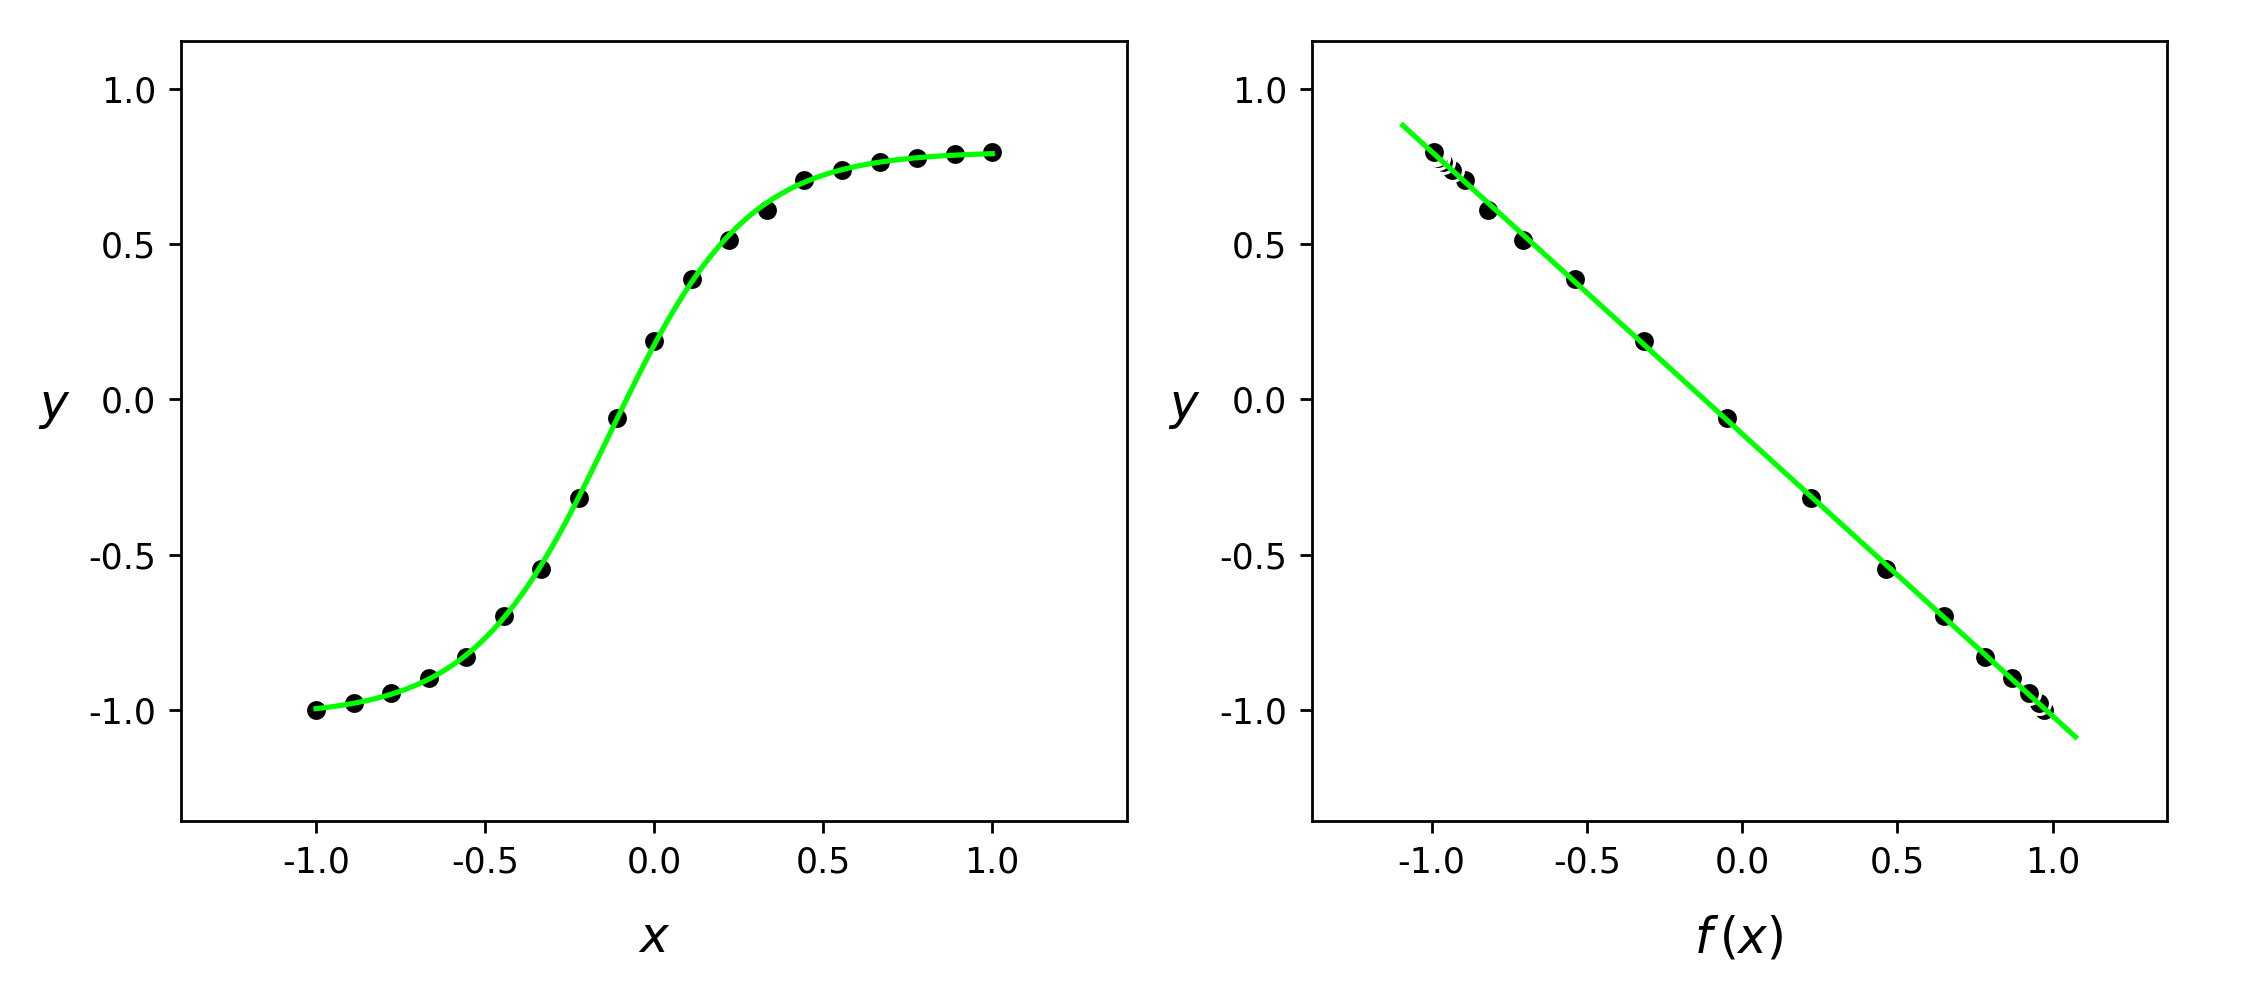

In [24]:
# static transform image
demo2.static_img(w_best,least_squares,predict,f1_x = [f(v,w_best) for v in x])

#### <span style="color:#a50e3e;">Example 7. </span> Galileo's ramp experiment

In 1638 Galileo Galilei, infamous for his expulsion from the Catholic church for daring to claim that the earth orbited the sun and not the converse (as was the prevailing belief at the time) published his final book: [Discourses and Mathematical Demonstrations Relating to Two New Sciences](https://books.google.com/books?hl=en&lr=&id=8BhZAAAAYAAJ&oi=fnd&pg=PA11&ots=5pQfKe7Bby&sig=VVWwm0GtVvS9YnydNJXHU_UxBjA#v=onepage&q&f=false). In this book, written as a discourse among three men in the tradition of Aristotle, he described his experimental and philosophical evidence for the notion of uniformly accelerated physical motion. Specifically, Galileo (and others) had intuition that the acceleration of an object due to (the force we now know as) gravity is uniform in time, or in other words that the distance an object falls is directly proportional (i.e., linearly related) to the amount of time it has been traveling, squared. This relationship was empirically solidified using the following ingeniously simple experiment performed by Galileo.

Repeatedly rolling a metal ball down a grooved $\frac{1}{2}$ meter long piece of wood set at an incline as shown in the Figure below, Galileo timed how long the ball took to get $\frac{1}{4}$,$\frac{1}{2}$, $\frac{2}{3}$, $\frac{3}{4}$, and all the way down the wood ramp. 

<p>
<figure>
  <img src= '../../mlrefined_images/nonlinear_superlearn_images/Fig_1_12.png' width="80%" height="60%" alt=""/>
  <figcaption>   
<strong>Figure 5:</strong> <em> Figurative illustration of
Galileo's ramp experiment setup used for exploring the relationship
between time and the distance an object falls due to gravity. To perform
this experiment he repeatedly rolled a ball down a ramp and timed
how long it took to get $\frac{1}{4}$,$\frac{1}{2}$, $\frac{2}{3}$,
$\frac{3}{4}$, and all the way down the ramp.  </em>  </figcaption> 
</figure>
</p>

 Why didn't Galileo simply drop the ball from some height and time how long it took to reach certain distances to the ground?  Because no reliable way to measure time yet existed (he had to use a [water clock](https://en.wikipedia.org/wiki/Water_clock) for these experiments)!   Galileo was the one who set humanity on the route towards its first reliable time-piece in his studies of the [pendulum](http://galileo.rice.edu/sci/instruments/pendulum.html)
 
Data from a ([modern reenactment](Straulino, S, "Reconstruction of Galileo Galilei's experiment: the inclined plane", Physics Education 43, 3 2008, pp. 316.)) of these experiments (averaged over 30 trials), results in the 6 data points shown below.

<IPython.core.display.Javascript object>


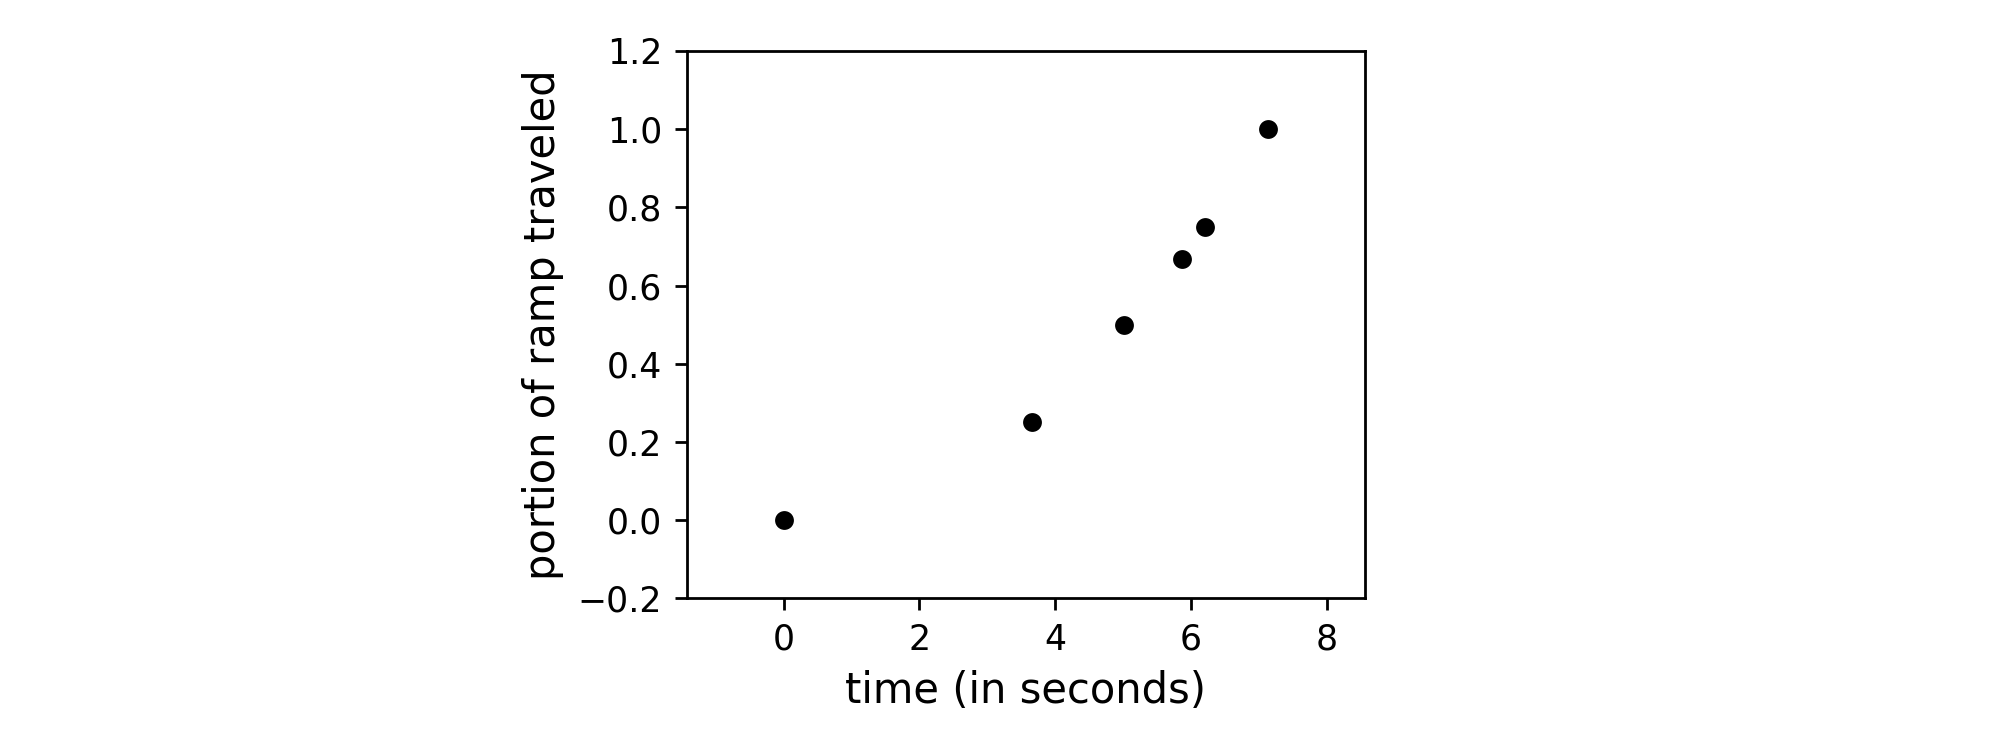

In [25]:
# create instance of linear regression demo, used below and in the next examples
demo3 = nonlib.nonlinear_regression_visualizer.Visualizer(csvname = datapath + 'galileo_ramp_data.csv')

# plot dataset
demo3.plot_data(xlabel = 'time (in seconds)',ylabel = 'portion of ramp traveled')

The data here certainly displays a nonlinear relationship and by viewing it - and using his physical intuition Galileo - intuitied a *quadratic* relationship.  Or in our jargon that for some $w_0$, $w_1$, and $w_2$ the prediction function 

\begin{equation}
\text{predict}(x) = w_0 + w_1x + w_2x^2
\end{equation}

provides the correct sort of nonlinearity to explain this data (albeit when the parameters are tuned correctly).

Notice here how we have 2 feature transformations: the identity $f_1(x) = x$ and the quadratic term $f_2(x) = x^2$, and so we may write the above equivalently as

\begin{equation}
\text{predict}(x) = w_0 + w_1\,f_1(x) + w_2\,f_2(x)
\end{equation}

which clearly shows how we are seeking out a proper linear relationship in the transformed feature space (which in this case is two-dimensional).  

We express each feature transformation, the `predict` function, and our Least Squares cost function in Python in the following cell.

In [27]:
# feature transformations
def f1(x):
    return x

def f2(x):
    return x**2
    
# prediction function
def predict(x,w):
    # linear combo
    a = w[0] + w[1]*f1(x) + w[2]*f2(x)
    return a

# least squares
def least_squares(w):
    cost = 0
    for p in range(0,len(y)):
        x_p = x[p]
        y_p = y[p]
        cost +=(predict(x_p,w) - y_p)**2
    return cost

And we optimize using e.g., (unnormalized) gradient descent.  In this case - as is the case whenever we use feature transformations with no internal parameters to tune (which we discuss further in our series of posts on kernels / boosted trees) - the resulting cost function is convex.

In [28]:
# get and center data
demo3.center_data(); x = demo3.x; y = demo3.y;

# declare an instance of our current our optimizers
opt = nonlib.optimimzers.MyOptimizers()

# run desired algo with initial point, max number of iterations, etc.,
w_best = opt.gradient_descent(g = least_squares,alpha = 10**(-2),w = np.random.randn(3,1),max_its = 2000,version = 'unnormalized',output = 'best')

Now we can plot our original data and nonlinear fit in the original space (left panel below), as well as transformed data and simultaneous *linear* fit in the transformed feature space (right panel below).  

<IPython.core.display.Javascript object>


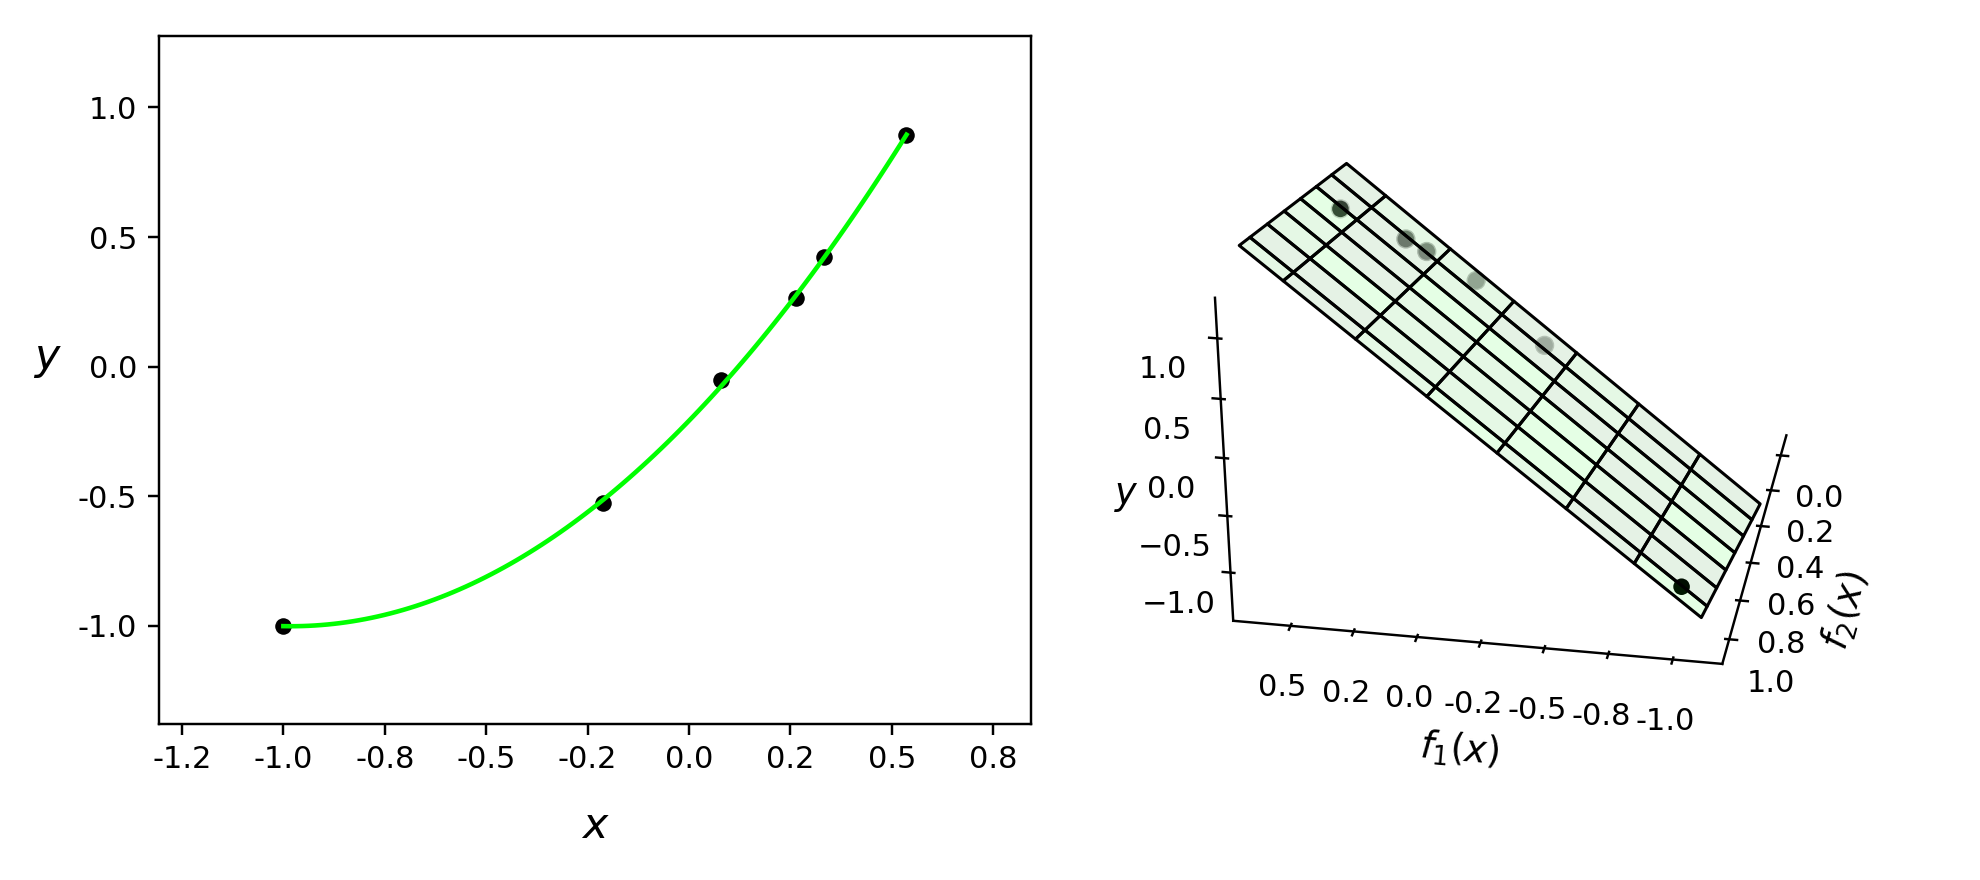

In [30]:
# static transform image
f1_x = [f1(v) for v in x]; f2_x = [f2(v) for v in x]
demo3.static_img(w_best,least_squares,predict,f1_x=f1_x,f2_x=f2_x,view = [35,100])

Notice again that since we have two features in this instance our linear fit is in a space one dimension higher than the original input space defined by $x$.  In other words, the transformed feature space here has *two* inputs: one defined by each of the two features $f_1$ and $f_2$.

This is true more generally speaking: the more feature transforms we use the higher the up we go in terms of the dimensions of our transformed feature space / linear fit!  In general if our original input has dimension $N$ - and is written as $\mathbf{x}$ - and we use a predict function that employs $B$ nonlinear feature transformations as

\begin{equation}
\text{predict}\left(\mathbf{x}\right) = w_0 + {w}_{1}\,f_1\left(\mathbf{x}\right) +  {w}_{2}\,f_2\left(\mathbf{x}\right) + \cdots + w_B\,f_B\left(\mathbf{x}\right)  
\end{equation}

then our original space has $N$ dimensional input, while our transformed feature space is $B$ dimensional.  

## 2.2  Introductory nonlinear classification examples 

We first examine a number of examples of nonlinear classification, summarizing our discoveries afterwards.

#### <span style="color:#a50e3e;">Example 8. </span> A one dimensional example

In discussing classification through the lens of [logistic regression](https://jermwatt.github.io/mlrefined/blog_posts/Linear_Supervised_Learning/Part_2_logistic_regression.html), we saw how linear classification can be thought of as a particular instance of nonlinear regression.  In particular how from this perspective we aim at fitting a curve (or surface in higher dimensions) that consists of a linear combination of our input shoved through the `tanh` function.  For $N=1$ dimensional input this regression looks like

\begin{equation}
\text{tanh}\left(w_0^{\,} + {w}_{1}^{\,}{x}_p\right) \approx y_p.
\end{equation}

Our `predict` function here is simply the linear combination

\begin{equation}
\text{predict}(x) =  w_0 +_{\,} w_1x_{\,}
\end{equation}

that defines the linear decision boundary - a single point in this instance - where $\text{predict}(x) = 0$.  As we discussed previously this decision boundary provides us with predicted labels for every possible input.  In particular if $\text{predict}(x) > 0$ then $x$ assigned to $+1$ class, if $\text{predict}(x) < 0$ assigned to $-1$ class.  This is illustrated in the Figure below.  We then tune these parameters by minimizing e.g., the softmax cost.  

<figure>
<p>
  <img src= '../../mlrefined_images/nonlinear_superlearn_images/logistic_1d_line.png' width="80%" height="80%" alt=""/>
  </p>
   <figcaption>   
<strong>Figure 6:</strong> <em> 
A prototypical $N = 1$ dimensional input shown from the regression perspective (top panel) and from 'above' (bottom panel) where label values are illustrated as colors (red for $+1$ and blue for $-1$).  A logistic regression fit providing perfect separation is shown in the top panel, along with the input line to `tanh` that defines the decision boundary for this problem (where this line pierces the input space).  Predictions are then made in the future based geometrically on this line / decision boundary, with predicted regions annotated in the bottom panel.
</em>  </figcaption> 
</figure>
</p>

However a linear predictor - a linear decision boundary - is quite inflexible in general and fails to provide good separation even in the simple example below.  Here we clearly need a `predict` function that can cross the input space (the x axis) twice at points separated by a large distance - something a line could never do.  This dataset is shown from the 'regression' perspective in the top panel - with output plotted explicitly - and 'from above' in the bottom panel with output denoted by color (with the usual scheme).

<IPython.core.display.Javascript object>


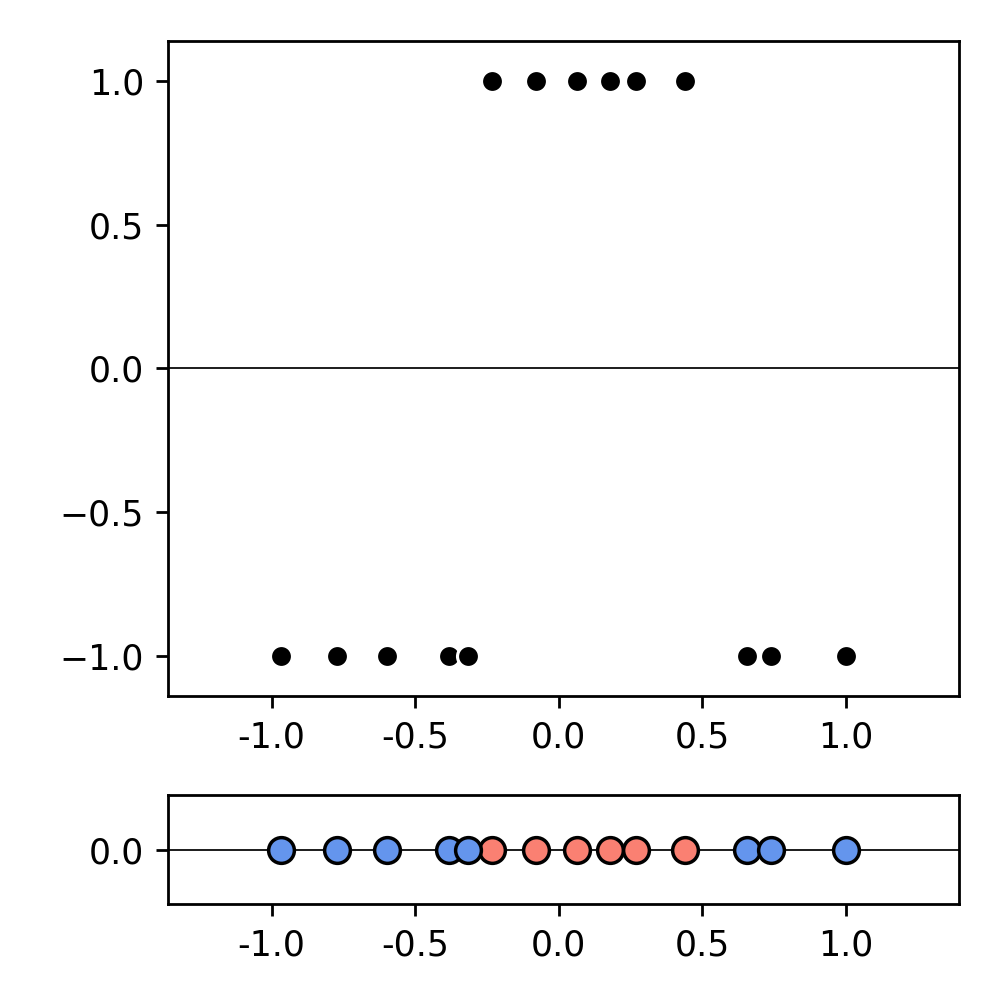

In [29]:
# create instance of linear regression demo, used below and in the next examples
demo4 = nonlib.nonlinear_classification_visualizer.Visualizer(csvname = datapath + 'signed_projectile.csv')

# plot dataset
demo4.plot_data()

What sort of simple function crosses the horizontal axis twice?  How about a quadratic function?  If adjusted to the right height a quadratic certainly can be made to cross the horizontal axis twice and - when shoved through a `tanh` - could indeed give us the sort of predictions we desire.  This idea is drawn figuratively for a dataset like the one above in the Figure below. 

<p>
  <img src= '../../mlrefined_images/nonlinear_superlearn_images/logistic_1d_quadratic.png' width="80%" height="80%" alt=""/>
</p>
<figcaption>   
<strong>Figure 7:</strong> <em> 
An example dataset like the one we are currently looking to learn a classifier on (shown from the regression perspective in the top panel, and 'from above' in the bottom panel).  Here we show what a quadratic predictor could achieve in terms of providing a proper decision boundary consisting of two distinct and separate points, with the proper regions of the space classified accordingly. 
</em>  </figcaption> 
</figure>
</p>

Using a generic quadratic function as our predictor takes the form

\begin{equation}
\text{predict}(x) = w_0 + w_1x^{\,} + w_2x^2.
\end{equation}

Here we have two *feature transformations* (we will write explicitly in code)

\begin{equation}
\text{feature transformations}: f_1(x) = x \,\,\,\,\,\, f_2(x) = x^2
\end{equation}

so we can write our predictor equivalently as

\begin{equation}
\text{predict}(x) = w_0 + w_1\,f_1(x) + w_2\,f_2(x).
\end{equation}

Notice here that - as with regression - while we think of this predictor as providing a *nonlinear* separation in the original space, it is indeed linear in the features themselves.  Hence - as we will see - it will simultaneously provide a *linear* fit in the *transformed feature space* - that is the space whose input axes are defined via these features.

We then look to tune these weights by minimizing the softmax cost function (although we could use any other cost like e.g., the perceptron) as $\,g\left(\mathbf{w}\right) = \sum_{p=1}^{P} \text{log}\left(1 + e^{-y_p\, \text{predict}_{}\left(x_p\right)} \right)$.  We write out each component of this functionality in Python in the next cell.

In [31]:
# feature transforms
def f1(x):
    return x

def f2(x):
    return x**2
    
# prediction function
def predict(x,w):
    # linear combo
    val = w[0] + w[1]*f1(x) + w[2]*f2(x)
    return val

# softmax cost
def softmax(w):
    cost = 0
    for p in range(0,len(y)):
        x_p = x[p]
        y_p = y[p]
        cost += np.log(1 + np.exp(-y_p*predict(x_p,w)))
    return cost

With our functionality defined we can then minimize the softmax cost using (unnormalized) gradient descent, as we do below.

In [32]:
# get data 
x = demo4.x; y = demo4.y;    

# declare an instance of our current our optimizers
opt = nonlib.optimimzers.MyOptimizers()

# run desired algo with initial point, max number of iterations, etc.,
w_best = opt.gradient_descent(g = softmax,w = np.random.randn(4,1),max_its = 2000,alpha = 10**(-1),version = 'normalized',output = 'best')

With our weights tuned and our predictor trained we can then plot the resulting fit / separation.  In the left panel we show the original dataset - from the regression perspective-  along with the nonlinear fit provided by our nonlinear logistic regressor $\text{tanh}\left(\text{predict}\left(x\right)\right) = y$.  In the right panel we show the same dataset only in the transformed feature space defined by our two features.  Here a datapoint that originally had input $x_p$ now has input $\left(f_1\left(x_p\right)\,,(f_2\left(x_p\right)\right)$.  In this space the separation / decision boundary is *linear*.

<IPython.core.display.Javascript object>


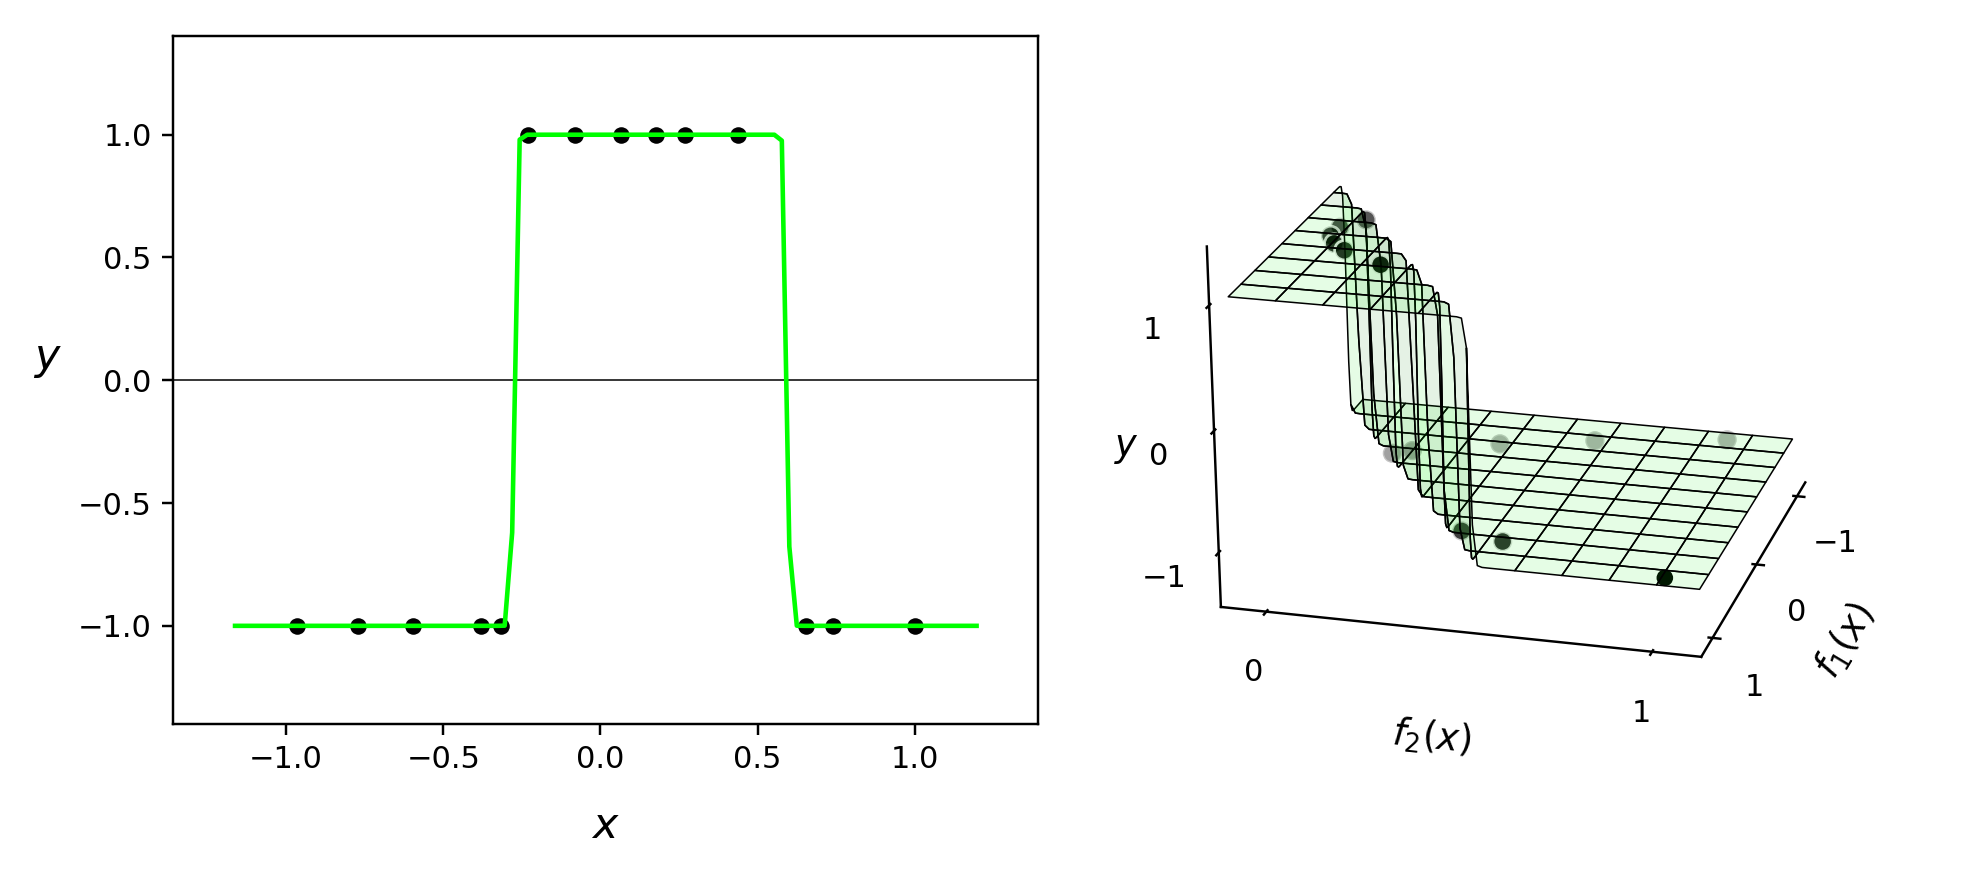

In [35]:
# static transform image
demo4.static_N1_img(w_best,least_squares,predict,f1_x = [f1(s) for s in x], f2_x = [f2(s) for s in x],view = [25,15])

What we see with this example - a nonlinear decision boundary in the original space being simultaneously *linear* in the transformed feature space - always happens in practice if we have chosen our features well (i.e., as to provide a good nonlinear decision boundary in the original space).  

> Properly designed features provide good nonlinear separation in the original feature space and, simultaneously, good linear separation in the transformed feature space.

Also notice here that since we have used two features our feature space is one dimension larger than the original space.  As was the case with regression this is true more generally speaking: the more feature transforms we use the higher the up we go in terms of the dimensions of our transformed feature space / linear separation!  In general if our original input has dimension $N$ - and is written as $\mathbf{x}$ - and we use a predict function that employs $B$ nonlinear feature transformations as

\begin{equation}
\text{predict}\left(\mathbf{x}\right) = w_0 + {w}_{1}\,f_1\left(\mathbf{x}\right) +  {w}_{2}\,f_2\left(\mathbf{x}\right) + \cdots + w_B\,f_B\left(\mathbf{x}\right)  
\end{equation}

then our original space has $N$ dimensional input, while our transformed feature space is $B$ dimensional.  

#### <span style="color:#a50e3e;">Example 8. </span> A two-dimensional example

Let us examine the following $N=2$ input dataset below, visualized the regression perspective (left panel) and 'from above' (right panel).

<IPython.core.display.Javascript object>


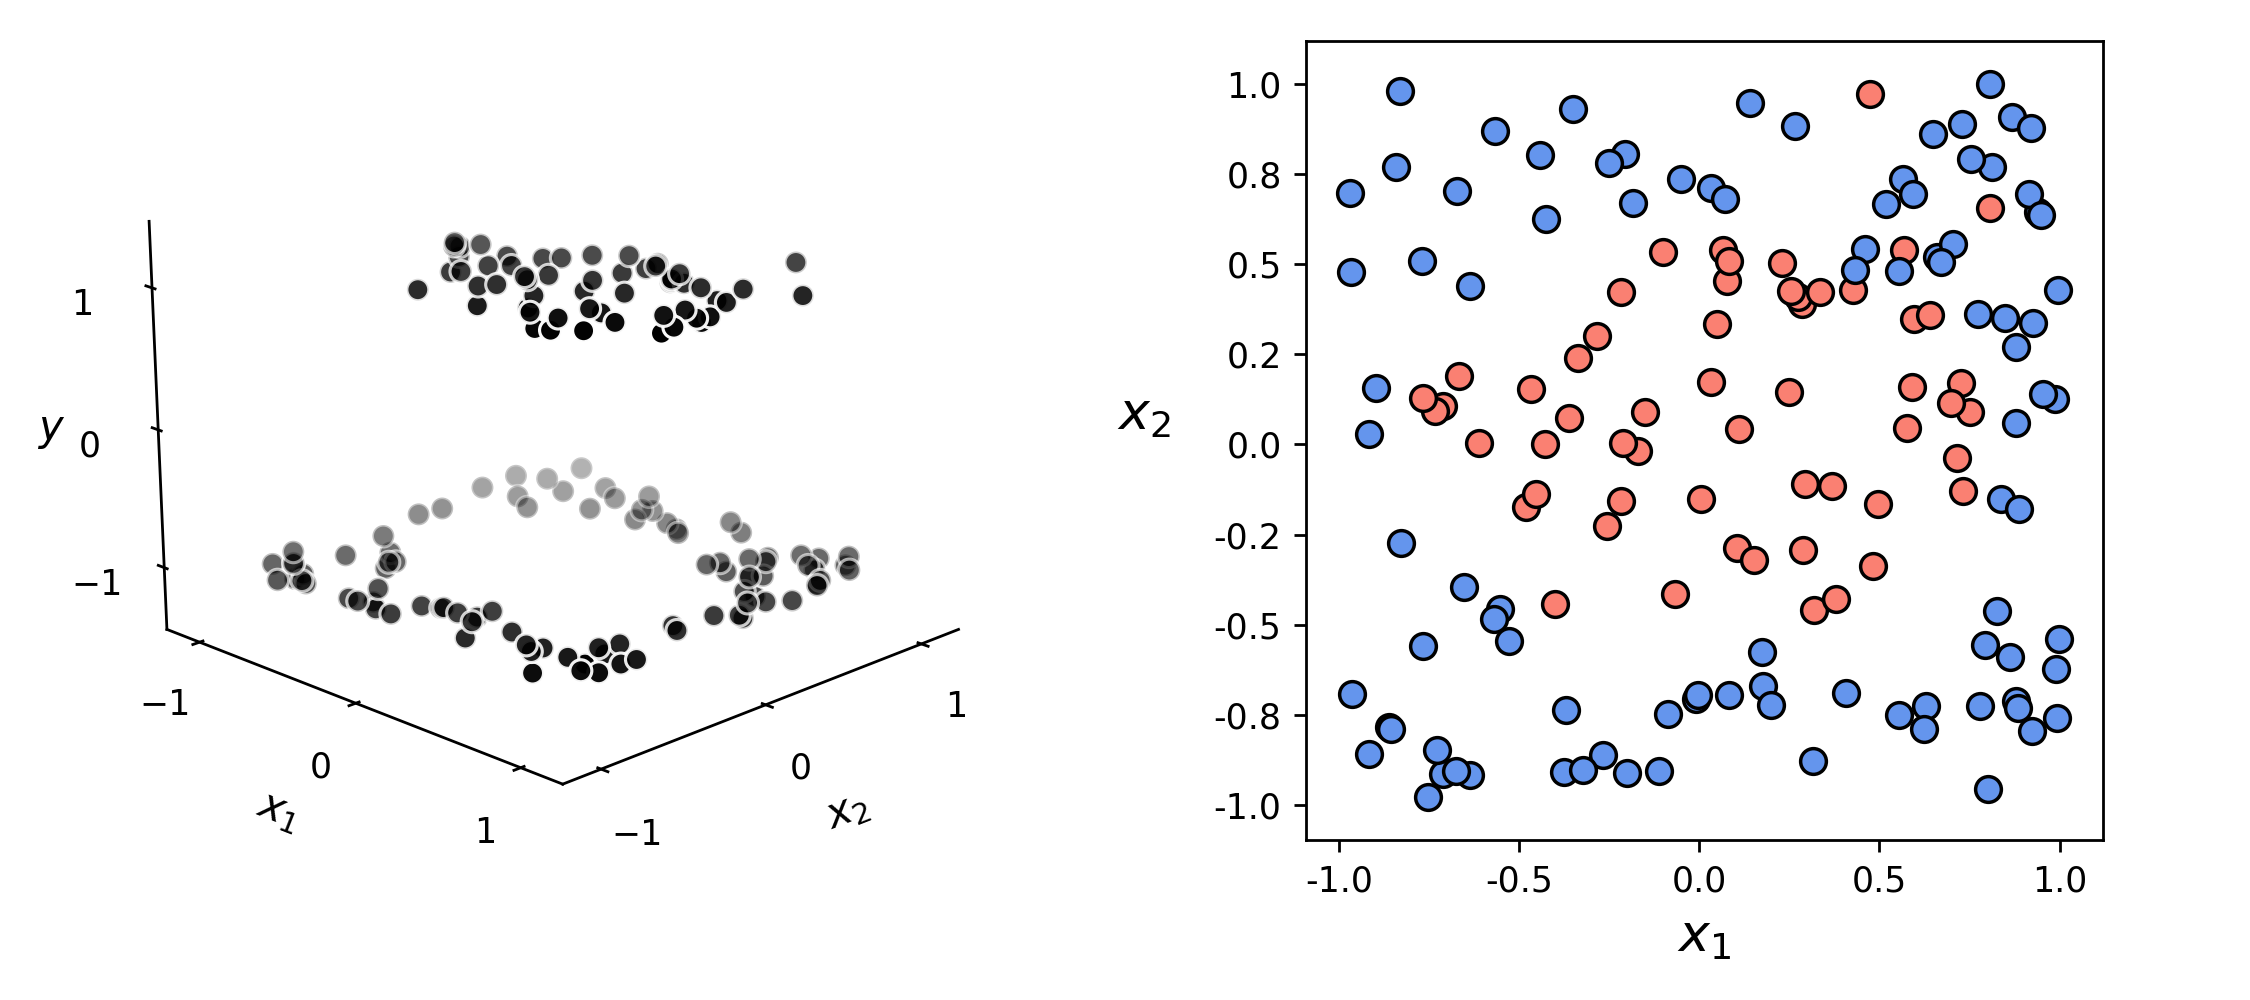

In [33]:
# create instance of linear regression demo, used below and in the next examples
demo5 = nonlib.nonlinear_classification_visualizer.Visualizer(datapath + 'ellipse_2class_data.csv')

# an implementation of the least squares cost function for linear regression for N = 2 input dimension datasets
demo5.plot_data()

Visually examining the dataset it appears that some sort of elliptical decision boundary centered at the origin might do a fine job of classification.  Thus we set our predictor function to the general parameterized form of such an ellipse, giving   

\begin{equation}
\text{predict}(x_1,x_2) = w_0^{\,} + w_1^{\,} x_1^2 + w_2^{\,}x_2^2.
\end{equation}

Parsing this formula ,we can see that we have used two feature transformations $f_1(x_1,x_2)=x_1^2$ and $f_2(x_1,x_2) = x_2^2$.  Expressing our `predict` function in terms of this notation we can see that our transformed feature space will have the same number of dimensions as our original space (i.e., two).

\begin{equation}
\text{predict}(x_1,x_2) = w_0 + w_1\,f_1\,\left(x_1,x_2\right) + w_2\,f_2\,\left(x_1,x_2\right).
\end{equation}

We write out each feature transformation, the prediction function, and softmax cost in Python below.

In [34]:
# feature transformations
def f1(x):
    return (x[0])**2

def f2(x):
    return (x[1])**2
    
# prediction function
def predict(x,w):
    # linear combo
    a = w[0] + w[1]*f1(x) + w[2]*f2(x)
    return a

# softmax cost
def softmax(w):
    cost = 0
    for p in range(0,len(y)):
        x_p = x[p,:]
        y_p = y[p]
        cost += np.log(1 + np.exp(-y_p*predict(x_p,w)))
    return cost

And now we minimize the softmax above via gradient descent.

In [36]:
# get data
x = demo5.x; y = demo5.y;   

# declare an instance of our current our optimizers
opt = nonlib.optimimzers.MyOptimizers()

# run desired algo with initial point, max number of iterations, etc.,
w_best = opt.gradient_descent(g = softmax,w = np.random.randn(3,1),max_its = 1000,alpha = 10**(-1),version = 'normalized',output = 'best')

With our weights tuned we can now plot the data in its original space (left panels) - along with the nonlinear decision boundary provided by the trained predictor - and in the transformed feature space (right panels) - where the corresponding decision boundary is linear.  In each panel we color a region of space by what class our predictor assigns it post training.  Indeed our presumption of an elliptical boundary seems like a good one here - as our classification results are quite good.

<IPython.core.display.Javascript object>


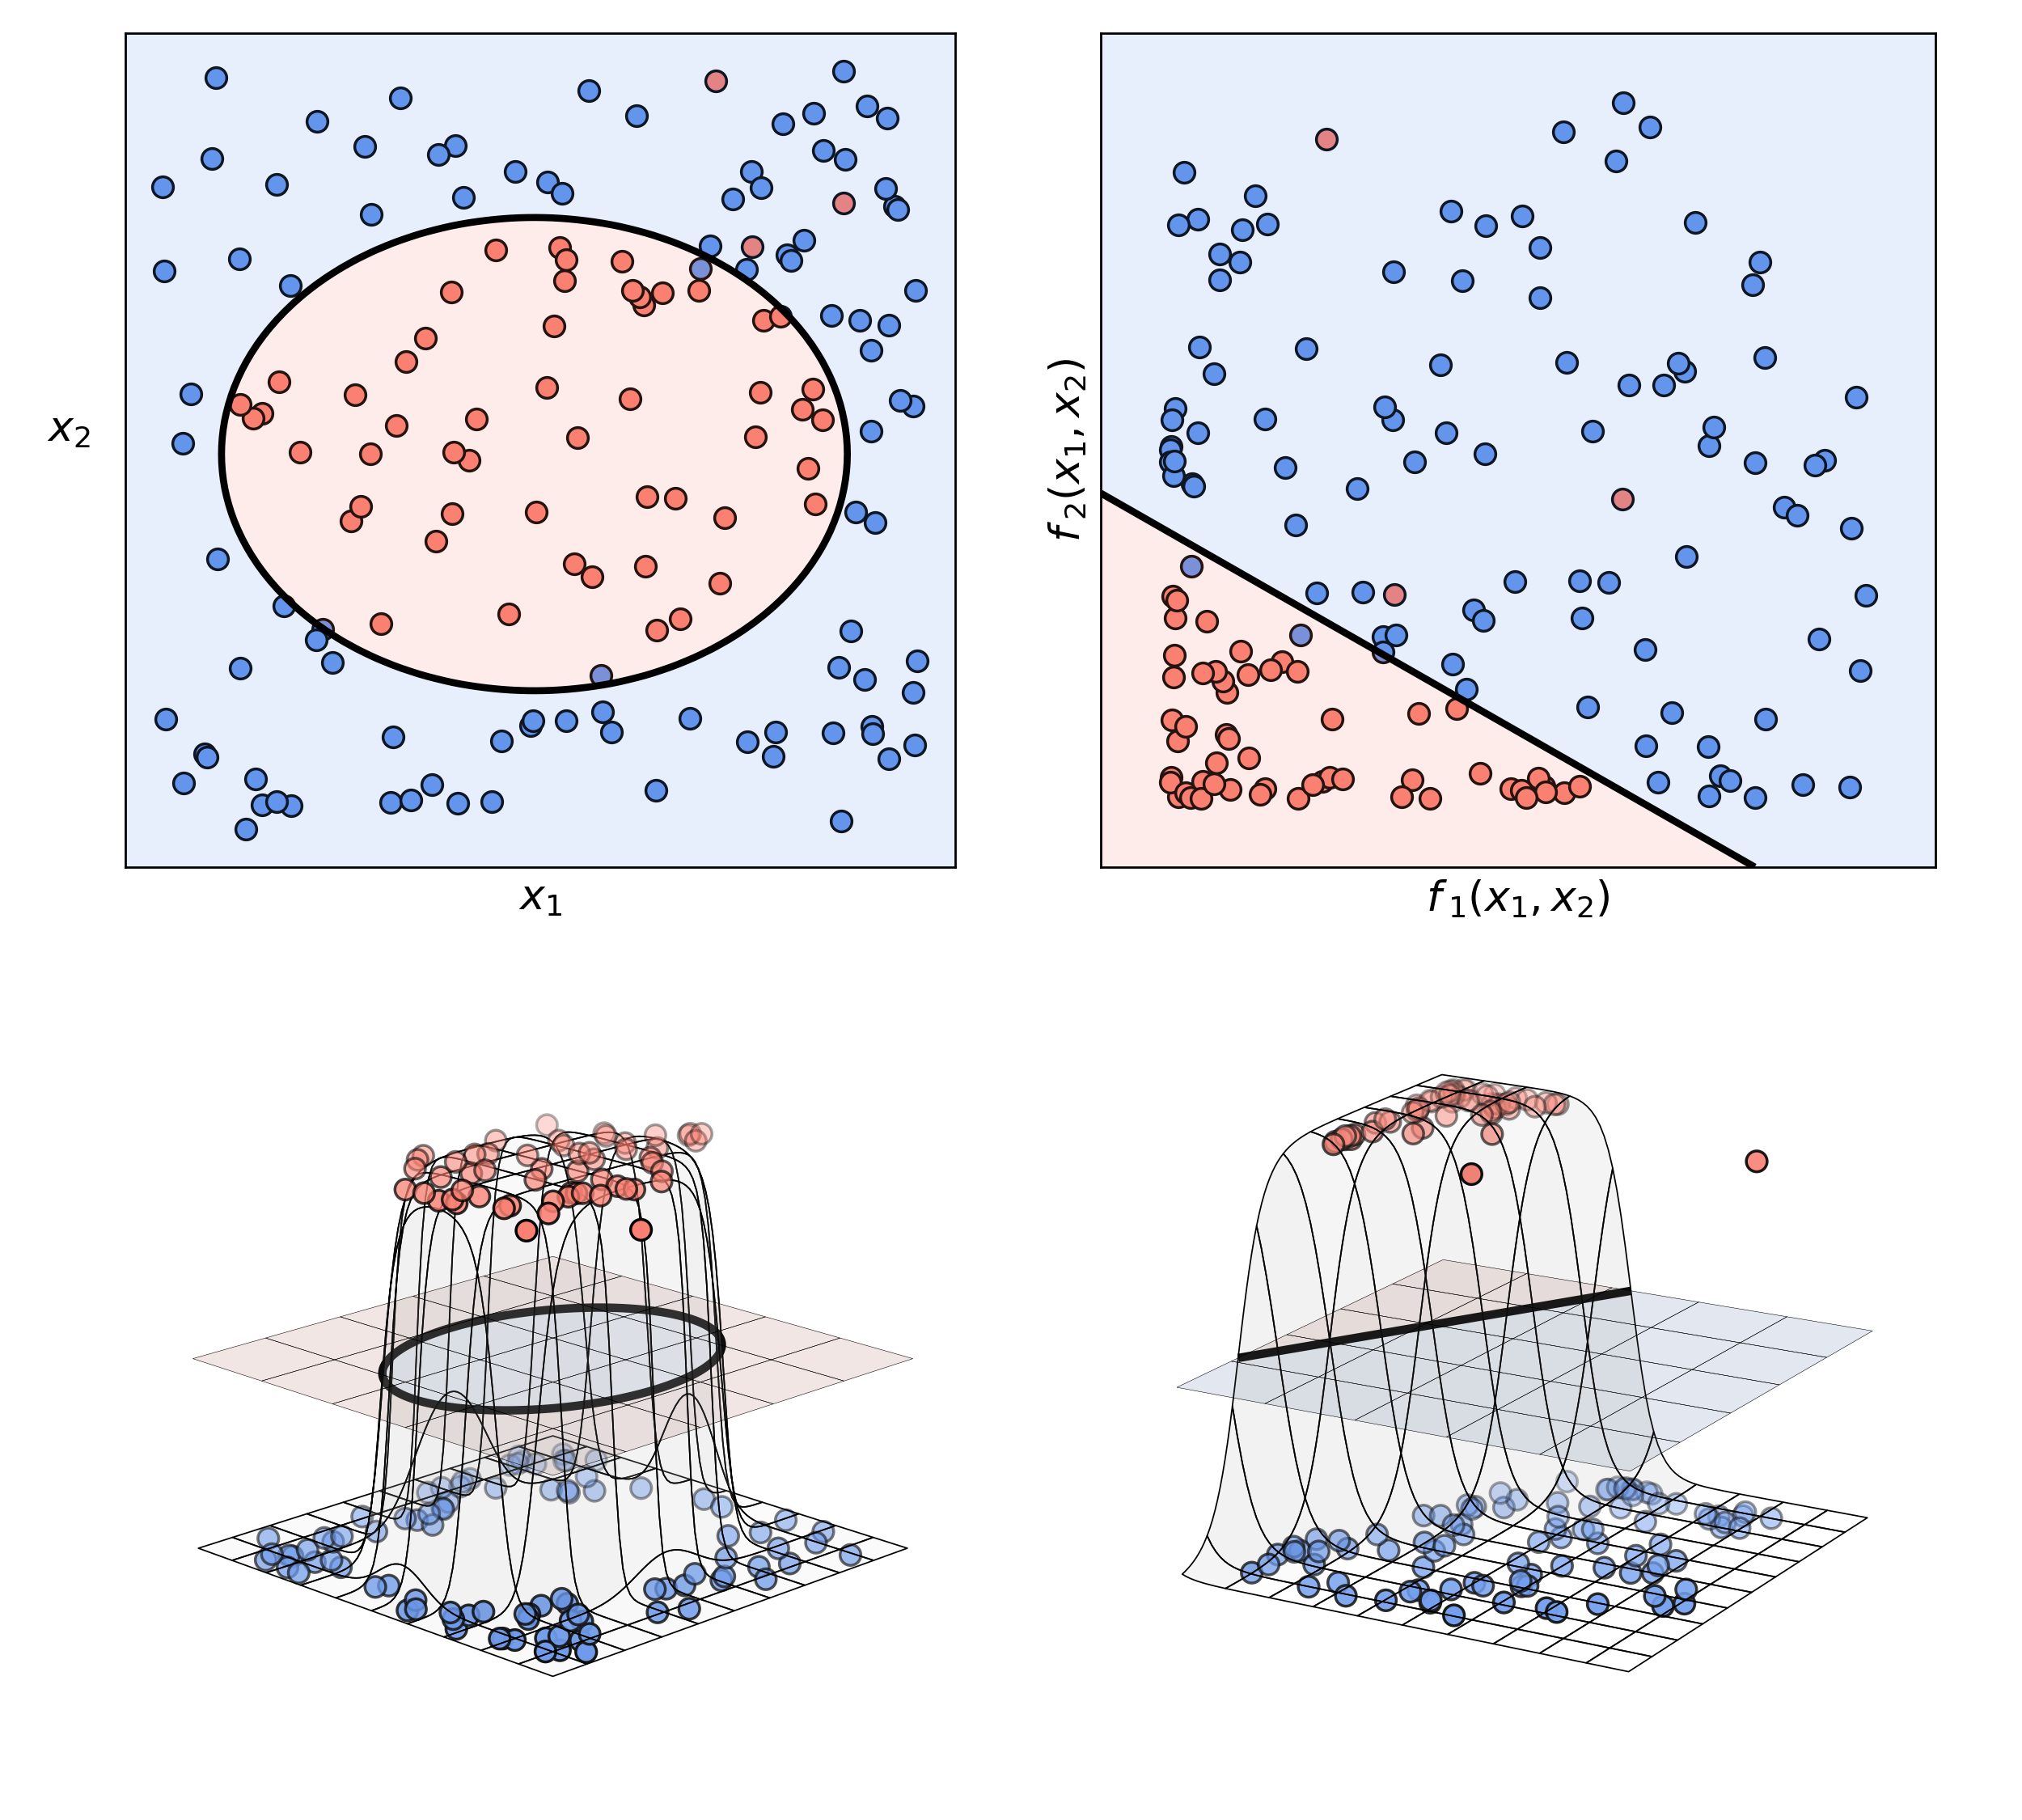

In [37]:
# illustrate results
demo5.static_N2_img(w_best,softmax,predict,f1,f2,view1 = [20,45],view2 = [20,30])

## 1.3  Conclusions

- We have seen that when we can identify a candidate nonlinearity we can quickly swap out linearity for nonlinearity in both our regression and classification paradigms

- Each nonlinearity is called a 'transformed feature' or just feature

- **For regression:**

> A properly designed feature (or set of features) provides a good nonlinear fit in the original feature space and, simultaneously, a good linear fit in the transformed feature space.

- **For classification:**
    
> Properly designed features provide good nonlinear separation in the original feature space and, simultaneously, good linear separation in the transformed feature space.

- But rarely can we identify a complete nonlinearity / all features of a dataset the way we have here ('by eye')  

- For example, can you identify the right features for these two datasets?

<figure>
  <img src= '../../../mlrefined_images/nonlinear_superlearn_images/Fig_3_9.png' width="50%" height="50%" alt=""/>
</figure>

<figure>
  <img src= '../../../mlrefined_images/nonlinear_superlearn_images/Fig_4_22.png' width="50%" height="50%" alt=""/>
</figure>

- Pretty hard!  And we can visualize these!

- And we have no chance of doing this when we have more than $N = 2$ inputs (we can't visualize!)

- This is where neural networks (as well as kernels and trees) come in!

In [ ]:
- Most datasets too high dimensional to visualize, and mechanics lie beyond our comprehension

- So in general we need something more robust - this is where machine learning comes in!

- Tools like neural networks help automate the search for proper nonlinear regressors / boundaries (as do trees and kernels)